# Contexte

la ville de Seattle a pour de devenir ville neutre en émissions de carbone en 2050, à l'aide de Deux relevés minutieux en 2015 et en 2016( qui vont construire notre dataset) on va prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments.

Cette  prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..).

Ce notebook contient notre travail de nettoyage, préparation de nos données et une analyse exploratoire. La modélisation est dans le deuxième notebook: Pélec_01_Code.


<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-librairies-et-préparation-de-l'environnement-du-travail" data-toc-modified-id="Import-des-librairies-et-préparation-de-l'environnement-du-travail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies et préparation de l'environnement du travail</a></span></li><li><span><a href="#Traitement-et-préparation-du-le-jeu-de-données" data-toc-modified-id="Traitement-et-préparation-du-le-jeu-de-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Traitement et préparation du le jeu de données</a></span><ul class="toc-item"><li><span><a href="#Import-du-jeu-de-données" data-toc-modified-id="Import-du-jeu-de-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import du jeu de données</a></span></li><li><span><a href="#Découverte-du-dataset" data-toc-modified-id="Découverte-du-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Découverte du dataset</a></span></li><li><span><a href="#Uniformisation-des-datasets." data-toc-modified-id="Uniformisation-des-datasets.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Uniformisation des datasets.</a></span></li><li><span><a href="#Concaténation-des-datasets" data-toc-modified-id="Concaténation-des-datasets-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Concaténation des datasets</a></span></li><li><span><a href="#La-résolution-du-problème-de-la-fuite-des-données" data-toc-modified-id="La-résolution-du-problème-de-la-fuite-des-données-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>La résolution du problème de la fuite des données</a></span></li><li><span><a href="#Analyse-des-données-manquantes" data-toc-modified-id="Analyse-des-données-manquantes-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Analyse des données manquantes</a></span></li></ul></li><li><span><a href="#Analyse-exploratoire" data-toc-modified-id="Analyse-exploratoire-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse exploratoire</a></span><ul class="toc-item"><li><span><a href="#Analyse-univariée" data-toc-modified-id="Analyse-univariée-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analyse univariée</a></span><ul class="toc-item"><li><span><a href="#La-distribution-des-variables" data-toc-modified-id="La-distribution-des-variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>La distribution des variables</a></span></li><li><span><a href="#les-graphiques-circulaires" data-toc-modified-id="les-graphiques-circulaires-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>les graphiques circulaires</a></span></li></ul></li><li><span><a href="#Analyse-bivariée" data-toc-modified-id="Analyse-bivariée-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analyse bivariée</a></span><ul class="toc-item"><li><span><a href="#Les-Graphiques-à-deux-variables" data-toc-modified-id="Les-Graphiques-à-deux-variables-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Les Graphiques à deux variables</a></span></li><li><span><a href="#La-matrice-des-corrélations" data-toc-modified-id="La-matrice-des-corrélations-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>La matrice des corrélations</a></span></li><li><span><a href="#Analyse-de-la-répartition-du-'SiteEnergyUse(kBtu)'-sur-'PrimaryPropertyType'-via-la-boite-à-moustaches" data-toc-modified-id="Analyse-de-la-répartition-du-'SiteEnergyUse(kBtu)'-sur-'PrimaryPropertyType'-via-la-boite-à-moustaches-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Analyse de la répartition du 'SiteEnergyUse(kBtu)' sur 'PrimaryPropertyType' via la boite à moustaches</a></span></li><li><span><a href="#Analyse-de-la-répartition-du-'SiteEnergyUse(kBtu)'-sur-'BuildingType'-via-la-boite-à-moustaches" data-toc-modified-id="Analyse-de-la-répartition-du-'SiteEnergyUse(kBtu)'-sur-'BuildingType'-via-la-boite-à-moustaches-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Analyse de la répartition du 'SiteEnergyUse(kBtu)' sur 'BuildingType' via la boite à moustaches</a></span></li><li><span><a href="#Analyse-de-l'Influence-de-l'âge-des-bâtiments-sur-'SiteEnergyUse(kBtu)'" data-toc-modified-id="Analyse-de-l'Influence-de-l'âge-des-bâtiments-sur-'SiteEnergyUse(kBtu)'-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Analyse de l'Influence de l'âge des bâtiments sur 'SiteEnergyUse(kBtu)'</a></span></li></ul></li></ul></li><li><span><a href="#Prétraitement-des-données" data-toc-modified-id="Prétraitement-des-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prétraitement des données</a></span><ul class="toc-item"><li><span><a href="#Unicité-des-identifiants-'OSEBuildingID'" data-toc-modified-id="Unicité-des-identifiants-'OSEBuildingID'-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Unicité des identifiants 'OSEBuildingID'</a></span></li><li><span><a href="#Liste-des-variables" data-toc-modified-id="Liste-des-variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Liste des variables</a></span></li></ul></li></ul></div>

## Import des librairies et préparation de l'environnement du travail

In [1]:
#Importing librairies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from urllib import request
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
import re
import os
import zipfile
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_validate

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("La version utilisée de la laibririe:  {}=={}".format(*r))


La version utilisée de la laibririe:  seaborn==0.11.1
La version utilisée de la laibririe:  scikit-learn==0.24.2
La version utilisée de la laibririe:  pandas==1.2.4
La version utilisée de la laibririe:  numpy==1.21.1
La version utilisée de la laibririe:  matplotlib==3.4.3


## Traitement et préparation du le jeu de données

### Import du jeu de données

In [3]:
%%time
path_2016=r"\Users\Utilisateur\Downloads\2016-building-energy-benchmarking.csv"
path_2015=r"\Users\Utilisateur\Downloads\2015-building-energy-benchmarking.csv"#### le chemin vers le répertoire des données
def import_Data(path,separator):
     
    return pd.read_csv(path,sep=separator)
data_2016= import_Data(path_2016,separator=',')
df_2015=import_Data(path_2015,separator=',')

Wall time: 183 ms


### Découverte du dataset

In [4]:
df_2015.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [5]:
data_2016.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [7]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [8]:
data_2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [9]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
#This function will print the details of our dataset
def description(data):
    print("\n")
    print('Le dataset est de taille:{}'.format( data.shape))
    print('Le dataset comporte {} lignes et {} colonnes'.format( data.shape[0], data.shape[1]))
    print('Le dataset contient {} colonnes de type object'.format( sum(data.dtypes==object)))
    print('Le dataset contient {} colonnes numérique'.format( sum(data.dtypes=='int64' )+sum( data.dtypes=='float64')))
    print('Le dataset contient {} colonnes de type booléans'.format( sum(data.dtypes==bool)))
    print('Le dataset contient {} colonnes de type date'.format( sum(data.dtypes=='datetime64')))
    print('Le dataset contient {} colonnes de type timedelta'.format( sum(data.dtypes=='timedelta[ns]')))
    #print('Le dataset contient {} colonnes de type catégorie'.format( sum(data.dtypes=='category')))
    print("\n")
print("La description du dataset de 2015 ")
description(df_2015)
print("La description du dataset de 2016 ")
description(data_2016)

La description du dataset de 2015 


Le dataset est de taille:(3340, 47)
Le dataset comporte 3340 lignes et 47 colonnes
Le dataset contient 15 colonnes de type object
Le dataset contient 32 colonnes numérique
Le dataset contient 0 colonnes de type booléans
Le dataset contient 0 colonnes de type date
Le dataset contient 0 colonnes de type timedelta


La description du dataset de 2016 


Le dataset est de taille:(3376, 46)
Le dataset comporte 3376 lignes et 46 colonnes
Le dataset contient 15 colonnes de type object
Le dataset contient 30 colonnes numérique
Le dataset contient 1 colonnes de type booléans
Le dataset contient 0 colonnes de type date
Le dataset contient 0 colonnes de type timedelta




In [11]:
def Check_duplicate(data,annee):
    if data.duplicated().any():
        return "Le dataset {0}  contient des données dupliquées".format(annee)
    return "Le dataset {0} ne contient pas des données dupliquées".format(annee)
Check_duplicate(data_2016,2016)
Check_duplicate(df_2015,2015)

'Le dataset 2016 ne contient pas des données dupliquées'

'Le dataset 2015 ne contient pas des données dupliquées'

On va analyser le nombre des données manquantes sur chaque variable.

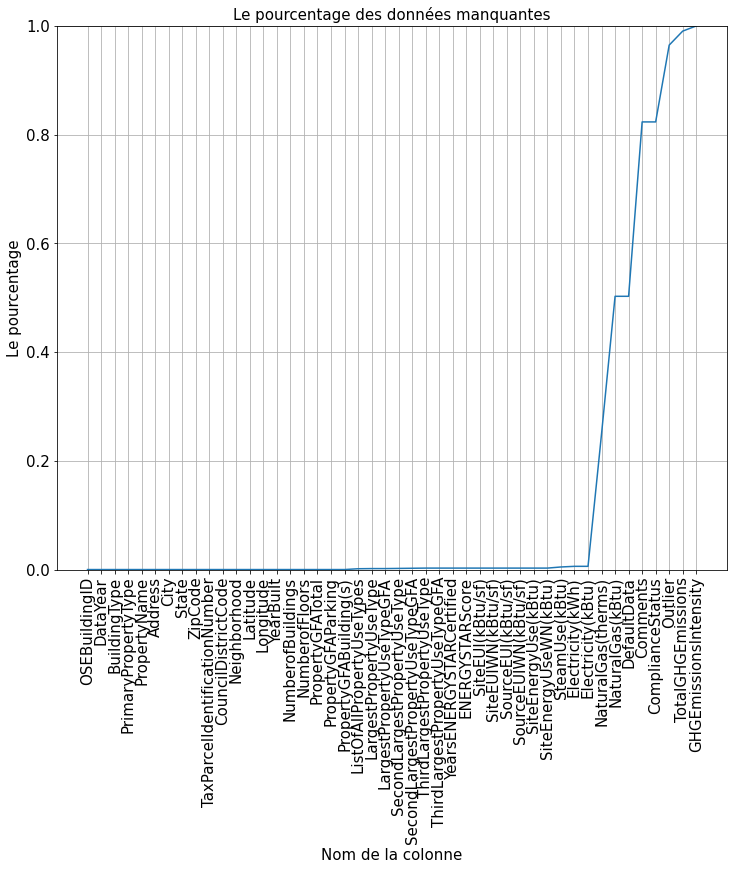

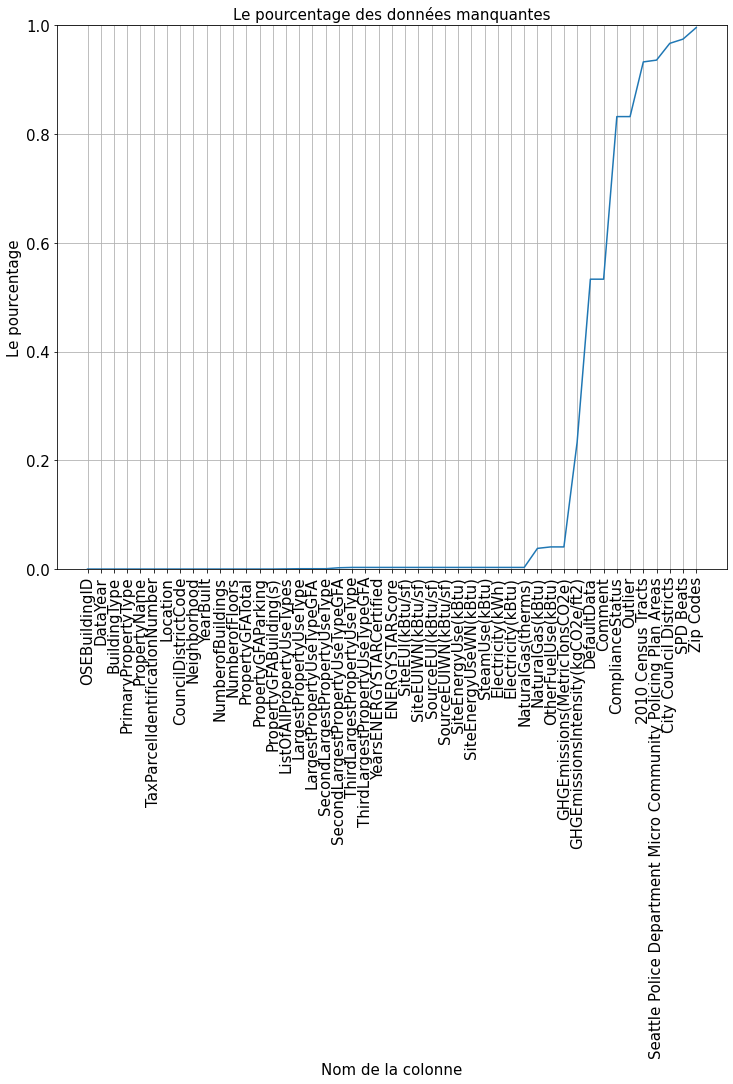

In [12]:
def plotting(data, name):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre
    #plt.subplot(2,3,i)
    plt.figure(figsize=(12,10))
    plt.plot(data.isnull().mean().sort_values().values)
    xint = []
    locs=range(len(data.columns))
    labels = data.columns
    #for each in locs:
        #xint.append(int(each))
    plt.xticks(locs,labels,rotation='vertical')
    #plt.xlim([0,data.shape[1]])
    plt.ylim([0,1])
    plt.xlabel("Nom de la colonne")
    plt.ylabel("Le pourcentage")
    plt.grid()
    
    plt.title("Le pourcentage des données manquantes")
plotting(data_2016,'data') 
plotting(df_2015,'data') 

On va analyser la distribution  des données manquantes.

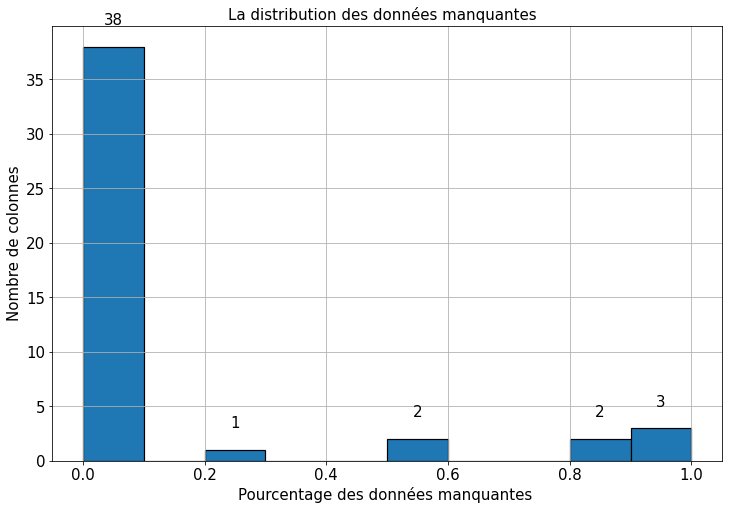

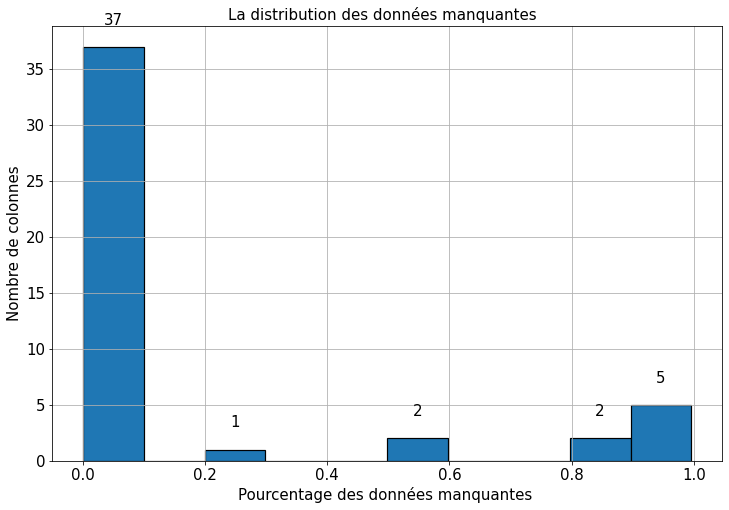

In [13]:
def histogram(data, name):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre
    #plt.subplot(2,3,i)
    fig, ax = plt.subplots(1, figsize=(12,8))
    #plt.figure(figsize=(12,10))
    n, bins, patches= plt.hist(data.isnull().mean().sort_values().values,edgecolor='black', linewidth=1.2)
    #xint = []
    #locs, labels = plt.xticks()
   # for each in locs:B
        #xint.append(int(each))
    #plt.xticks(xint)
    #plt.xlim([0,data.shape[1]])
    #plt.yticks([0,20,40,60,80,100,120,125])
    # plot values on top of bars
    xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
    for idx, value in enumerate(n):
        if value > 0:
            plt.text(xticks[idx], value+2, int(value), ha='center')

    plt.ylabel("Nombre de colonnes")
    plt.xlabel("Pourcentage des données manquantes ")
    plt.grid()
    
    plt.title("La distribution des données manquantes  ")
    plt.show()
   

histogram(data_2016,'data') 
histogram(df_2015,'data') 

### Uniformisation des datasets.

On va vérifier si les deux datasets contiennent les memes variables.

In [14]:
a=list(data_2016.OSEBuildingID.unique())
b =list(df_2015.OSEBuildingID.unique())
len(a)
len(b)
result = all(elem in a  for elem in b)
if result:
    print("all variables in 2015 exists in 2016")
else:
    print("Some  elements in 2015 doesn't exist in 2016")
    
result = all(elem in b  for elem in a)
if result:
    print("all variables in 2016 exists in 2015")
else:
    print("Some  elements in 2016 doesn't exist in 2015")


3376

3340

Some  elements in 2015 doesn't exist in 2016
Some  elements in 2016 doesn't exist in 2015


On va analyser les variables afin de pouvoir identifier les types des variables et identifier s'il y a des variables qui pourraient induire à un 'Data Leakage'

In [15]:
len(data_2016["GHGEmissionsIntensity"].value_counts())
data_2016["GHGEmissionsIntensity"].value_counts()

511

0.15    99
0.17    99
0.16    96
0.18    86
0.19    78
        ..
7.97     1
2.30     1
3.38     1
7.63     1
4.42     1
Name: GHGEmissionsIntensity, Length: 511, dtype: int64

In [16]:
len(df_2015["Comment"].value_counts())
df_2015["Comment"].value_counts()

13

Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu    1
Part of McKinstry's campus, property includes a warehouse, a local pipe supplier, and a local insulation contractor.  Learn more at www.mckinstry.com.                                                                                                             1
Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.                                                                                                               1
Recent energy efficiency upgrades include replaced toilets with low flow models in all units and participation in lighting rebate program to replace bulbs with CFLs or LEDs. Future improvements include whole building 

In [17]:
len(df_2015['SPD Beats'].value_counts())
df_2015['SPD Beats'].value_counts()

51

40.0    198
5.0     127
9.0     124
10.0    124
12.0    117
36.0    115
39.0    114
7.0     113
38.0    102
27.0     84
22.0     84
48.0     82
19.0     81
4.0      79
1.0      78
28.0     77
49.0     75
50.0     74
35.0     73
26.0     73
20.0     73
11.0     71
2.0      71
47.0     68
3.0      64
30.0     64
37.0     58
24.0     57
6.0      51
31.0     51
16.0     50
32.0     50
33.0     50
34.0     46
17.0     40
21.0     39
29.0     38
25.0     36
15.0     36
42.0     35
13.0     35
51.0     35
18.0     32
8.0      29
41.0     29
45.0     27
44.0     26
43.0     24
14.0     24
23.0     20
46.0     15
Name: SPD Beats, dtype: int64

In [18]:

categorical_2016=["BuildingType","PrimaryPropertyType","CouncilDistrictCode","Neighborhood","yearbuilt","NumberofBuildings","NumberofFloors","ListOfAllPropertyUseTypes","LargestPropertyUseType","SecondLargestPropertyUseType","ThirdLargestPropertyUseType","YearsENERGYSTARCertified","ENERGYSTARScore","DefaultData","ComplianceStatus","Outlier"]
obj_2016=["PropertyName","Comments"]
Numerical_2016=["OSEBuildingID","DataYear","zipcode","TaxParcelIdentificationNumber","Latitude","Longitude","PropertyGFATotal","PropertyGFAParking","PropertyGFABuilding(s)","LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA","SiteEUI(kBtu/sf)","SiteEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)","SourceEUIWN(kBtu/sf)","SiteEnergyUseWN(kBtu)","SiteEnergyUse(kBtu)","SteamUse(kBtu)","Electricity(kWh)","Electricity(kBtu)","NaturalGas(therms)","NaturalGas(kBtu)","TotalGHGEmissions","GHGEmissionsIntensity"]
data_leak_columns = ["SiteEUI(kBtu/sf)","SiteEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)","SourceEUIWN(kBtu/sf)","SiteEnergyUseWN(kBtu)"]

On va chercher les colonnes qui existent dans le dataset du 2016 et pas dans celui de 2015.

In [19]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [20]:
data_col=list(data_2016.columns)
df_col=list(df_2015.columns)
a=set(data_col)-set(df_col)
a



{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [21]:
data_2016[list(a)]
data_2016['City'].unique()
data_2016['Comments'].unique()
data_2016['State'].unique()

,GHGEmissionsIntensity,State,Address,Longitude,TotalGHGEmissions,City,ZipCode,Latitude,Comments
0,2.83,WA,405 Olive way,-122.33799,249.98,Seattle,98101.0,47.61220,NaN
1,2.86,WA,724 Pine street,-122.33393,295.86,Seattle,98101.0,47.61317,NaN
2,2.19,WA,1900 5th Avenue,-122.33810,2089.28,Seattle,98101.0,47.61393,NaN
3,4.67,WA,620 STEWART ST,-122.33664,286.43,Seattle,98101.0,47.61412,NaN
4,2.88,WA,401 LENORA ST,-122.34047,505.01,Seattle,98121.0,47.61375,NaN
...,...,...,...,...,...,...,...,...,...
3371,1.70,WA,1600 S Dakota St,-122.31154,20.94,Seattle,NaN,47.56722,NaN
3372,2.01,WA,719 8th Ave S,-122.32283,32.17,Seattle,NaN,47.59625,NaN
3373,16.99,WA,1920 1st Ave W,-122.35784,223.54,Seattle,NaN,47.63644,NaN
3374,1.57,WA,8319 8th Ave S,-122.32431,22.11,Seattle,NaN,47.52832,NaN


array(['Seattle'], dtype=object)

array([nan])

array(['WA'], dtype=object)

On remarque que pour les colonnes: 'City','State'et 'Comments' ils sonts les trois remplies que par une unique valeur , la première fait référence à la ville Seattle, la deuxième à Washington; l'état dans lequel se rtrouve la ville, la troisième concerne des commentaires mais elle ne contient aucune donnée. Donc, il y a une possibilité de les retirer avec 'Address', car ça ne va pas nous servir dans notre étude.

On va maintenant chercher les colonnes qui existent dans le dataset du 2015 et pas dans celui de 2016.


In [22]:
b=set(df_col)-set(data_col)
b

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [23]:
data_2016.TotalGHGEmissions.describe()
data_2016.GHGEmissionsIntensity.describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [24]:
df_2015['GHGEmissions(MetricTonsCO2e)'].describe()
df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

Les odres de grandeur des 2 variables 'GHGEmissions(MetricTonsCO2e)' et 'TotalGHGEmissions' sont identiques entre 2015 et 2016.La meme chose onn la remarque pour 'GHGEmissionsIntensity(kgCO2e/ft2)' et 'GHGEmissionsIntensity'.

Nous allons donc simplement renomer les colonnes à l'identique.



In [25]:
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'
                                    })

In [26]:
df_2015['Comment'].nunique()

13

On a remarqué que deux colonnes sont équivalentes mais ils sont nommées différement, il s'agit de:
'Comment' avec 'Comments' et 'Zip Codes' avec 'ZipCode' donc on va modifier les noms de ces deux colonnes.

Les colonnes '2010 Census Tracts','City Council Districts','SPD Beats', et 'Seattle Police Department Micro Community Policing Plan Areas' ne vont pas servir dans notre étude, donc on va les supprimer.

On va extraire les informations 'Latitude'et 'Longitude' à partir de la colonne 'Location' et on va la supprimer après.

In [27]:
df_2015.rename(columns={'Comment':'Comments','Zip Codes':'ZipCode'},inplace=True)
#df_2015 = df_2015.drop(axis=1,columns=['2010 Census Tracts','City Council Districts','GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)','OtherFuelUse(kBtu)','SPD Beats',
      #'Seattle Police Department Micro Community Policing Plan Areas'])


In [28]:
print(df_2015.Location.iloc[0])

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}


On remarque qu'on peut extraire : 'Latitude','Longitude' à partir de la colonne 'Location'

In [29]:
df_2015[['Latitude', 'Longitude']] = df_2015.Location.str.extract(r"\{'latitude': '(?P<Latitude>\d+\.\d+)', 'longitude': '(?P<Longitude>-?\d+\.\d+)'.+",expand=True)#.isnull().any()

On va supprimer les colonnes qu'on a identifié comme non nécessaires pour notre analyse.

In [30]:
df_2015 = df_2015.drop(axis = 1,columns = ['Location', 'OtherFuelUse(kBtu)','2010 Census Tracts','City Council Districts','SPD Beats','Seattle Police Department Micro Community Policing Plan Areas' ])
data_2016 = data_2016.drop(axis = 1,columns = ['Address', 'City', 'State' ])

### Concaténation des datasets


On va vérifier une nouvelle fois que nos deux datasets possèdent les même colonnes.

In [31]:
df_2015.shape
data_2016.shape

(3340, 43)

(3376, 43)

In [32]:
data_col=list(data_2016.columns)
df_col=list(df_2015.columns)
a=set(data_col)-set(df_col)
a



set()

In [33]:
data_full = pd.concat([data_2016,df_2015])
data_full.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,98101.0,0659000030,7,DOWNTOWN,47.6122,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,0659000220,7,DOWNTOWN,47.61317,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,98101.0,0659000475,7,DOWNTOWN,47.61393,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,98101.0,0659000640,7,DOWNTOWN,47.61412,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),98121.0,0659000970,7,DOWNTOWN,47.61375,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [34]:
data_full.shape

(6716, 43)

On va vérifier la variable 'ComplianceStatus' qui représente la conformité des données relevées :

In [35]:
data_full["ComplianceStatus"].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant', 'Not Compliant'], dtype=object)

On va garder seulement les lignes avec l'état 'Compliant'. On va calculer le nombre des lignes avec dess données non conforme

In [36]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(data_full[data_full['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 168.


In [37]:
data_full = data_full[data_full['ComplianceStatus'] == "Compliant"]

### La résolution du problème de la fuite des données 

En analysant nos variables et les fichiers 'json' qui contiennent des informations sur les variables, on a trouvé que plusieurs variables peuvent induire à une fuite de données lors de l'apprentissage.

In [38]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6548 entries, 0 to 3339
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6548 non-null   int64  
 1   DataYear                         6548 non-null   int64  
 2   BuildingType                     6548 non-null   object 
 3   PrimaryPropertyType              6548 non-null   object 
 4   PropertyName                     6548 non-null   object 
 5   ZipCode                          6535 non-null   float64
 6   TaxParcelIdentificationNumber    6546 non-null   object 
 7   CouncilDistrictCode              6548 non-null   int64  
 8   Neighborhood                     6548 non-null   object 
 9   Latitude                         6548 non-null   object 
 10  Longitude                        6548 non-null   object 
 11  YearBuilt                        6548 non-null   int64  
 12  NumberofBuildings   

In [39]:
data_leak_columns = ["SteamUse(kBtu)","SiteEUI(kBtu/sf)","SiteEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)","SourceEUIWN(kBtu/sf)","SiteEnergyUseWN(kBtu)"]

On doir retirer les colonnes qui peuvent contenir des informations sur notre variable cible, à savoir 'SiteEnergyUse(kBtu)'

In [40]:
data_full = data_full.drop(columns = data_leak_columns)

### Analyse des données manquantes

On va supprimer les colonnes suivantes(DefaultData,Comments,Outlier,ComplianceStatus) à cause du nombre des données manquantes et leurs importance dans le cadre de notre étude.

On va supprimer les valeurs manquantes sur la variable cible 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'

In [41]:
data_full = data_full.drop(columns = ["DefaultData","Comments","Outlier","ComplianceStatus","CouncilDistrictCode","TaxParcelIdentificationNumber"])

In [42]:
data_full.dropna(subset = ['SiteEnergyUse(kBtu)','TotalGHGEmissions'] , inplace = True)

In [43]:
data_full.shape

(6537, 31)

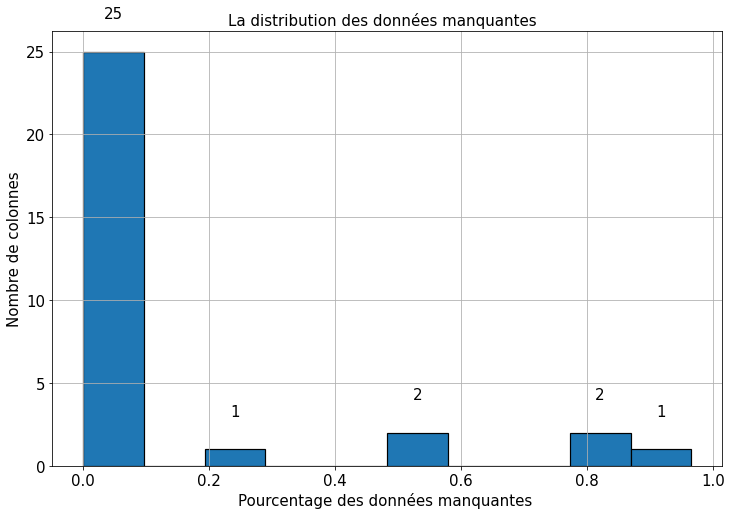

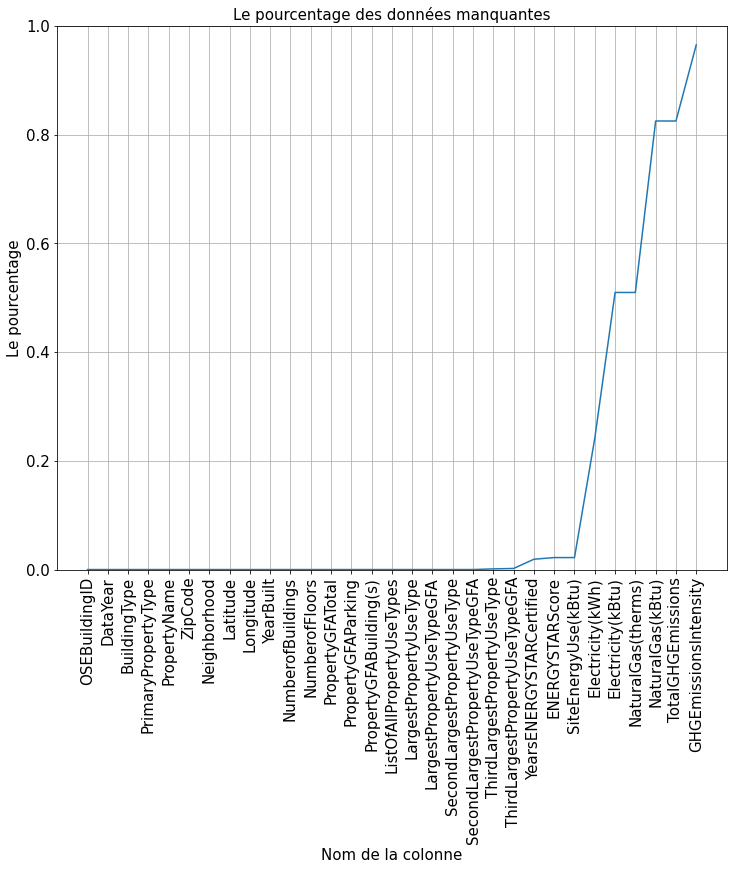

In [44]:
histogram(data_full,'data')
plotting(data_full,'data')


## Analyse exploratoire

Après avoir nettoyé les données, Nous allons effectuer une analyse exploratoire du jeu de données déjà néttoyé ,où nous seront amenés à effectuer des analyses univariées et bivariées.


### Analyse univariée

#### La distribution des variables

Pour nos variables numériques on va afficher leurs histogrammes pour avoir une idée de la distribution de chacune des varibales

In [45]:
categorical=["PrimaryPropertyType","CouncilDistrictCode","Neighborhood","LargestPropertyUseType","SecondLargestPropertyUseType","ThirdLargestPropertyUseType","YearsENERGYSTARCertified","BuildingType","NumberofBuildings","NumberofFloors","ListOfAllPropertyUseTypes"]
obj=["PropertyName"]
numerical=["YearBuilt","ENERGYSTARScore","PropertyGFATotal","PropertyGFAParking","PropertyGFABuilding(s)","LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA","SiteEnergyUse(kBtu)","Electricity(kWh)","Electricity(kBtu)","NaturalGas(therms)","NaturalGas(kBtu)",'TotalGHGEmissions']

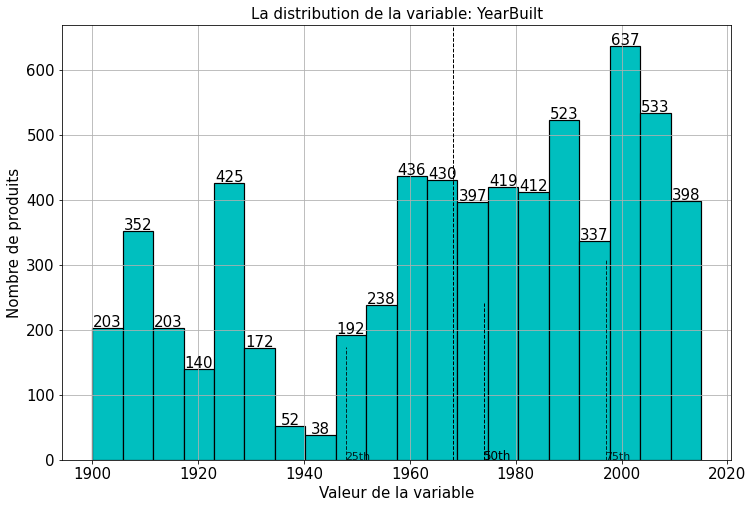

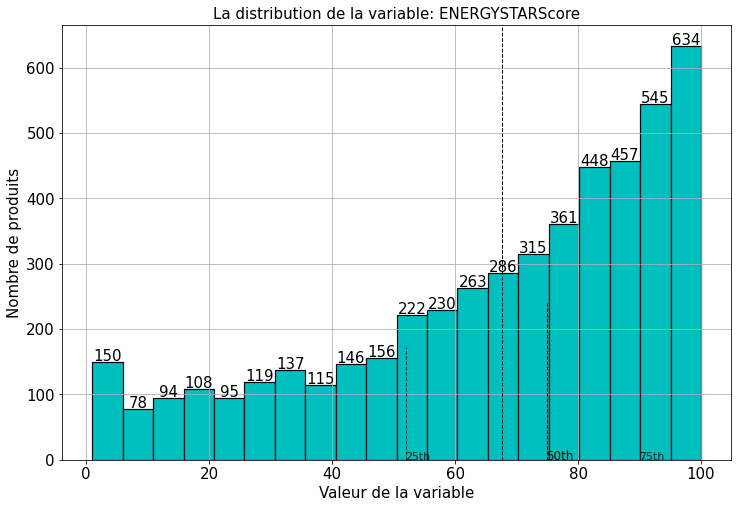

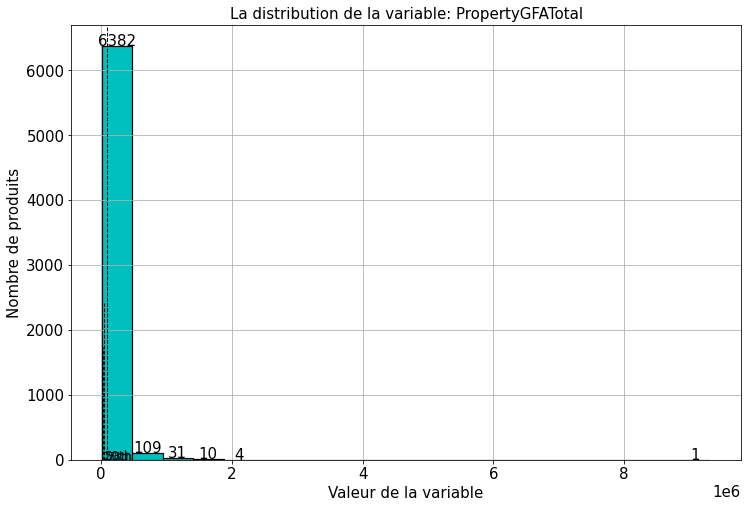

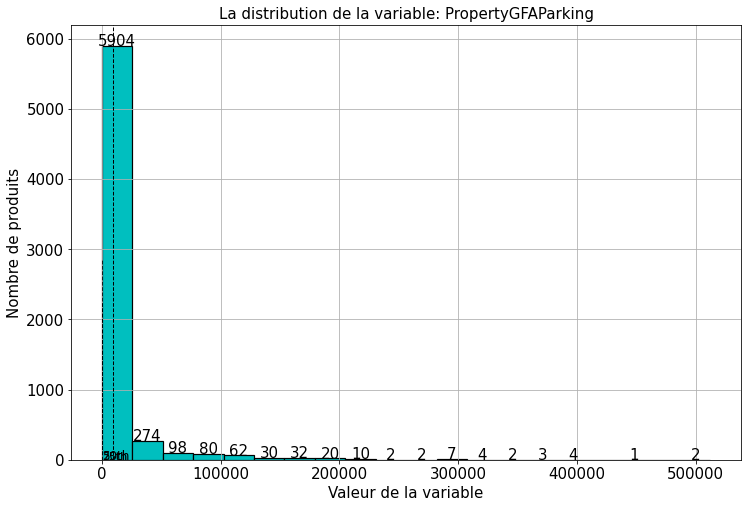

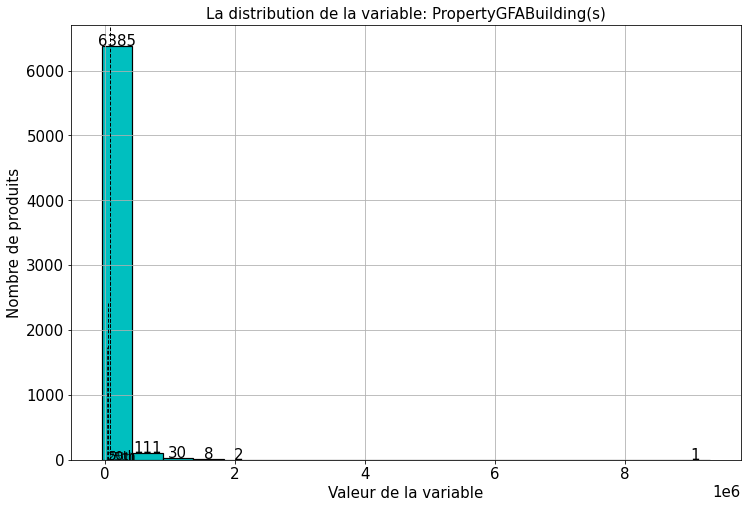

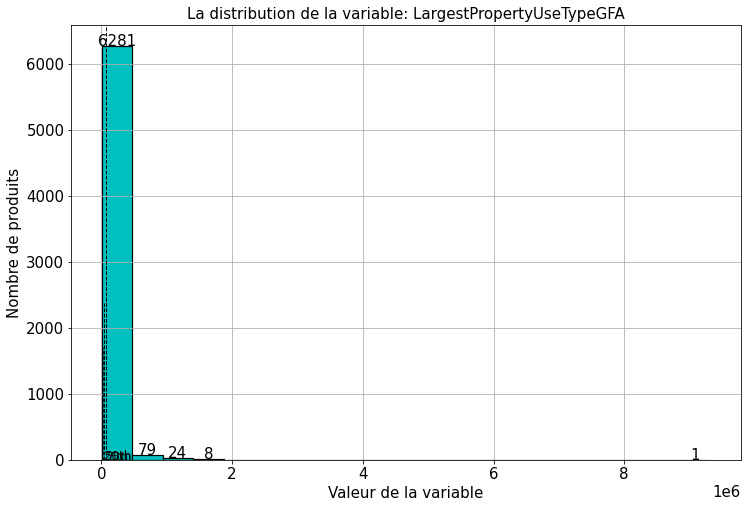

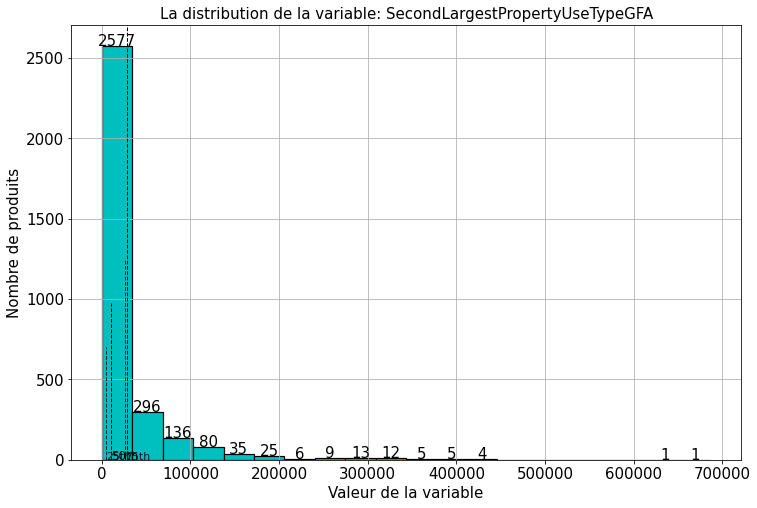

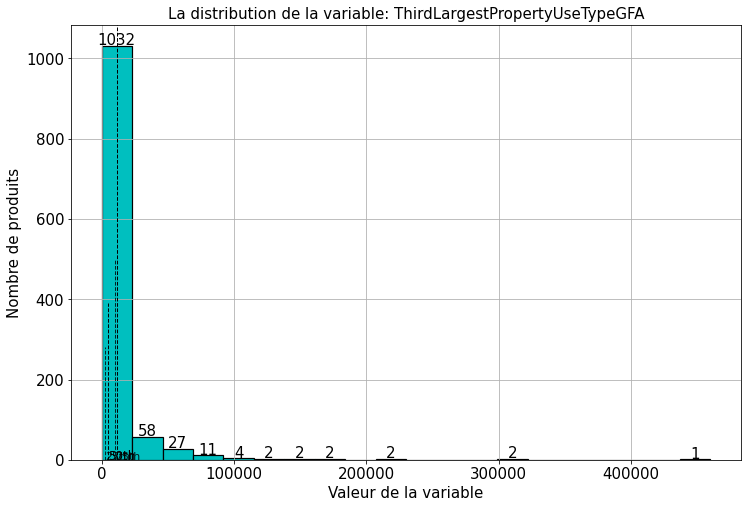

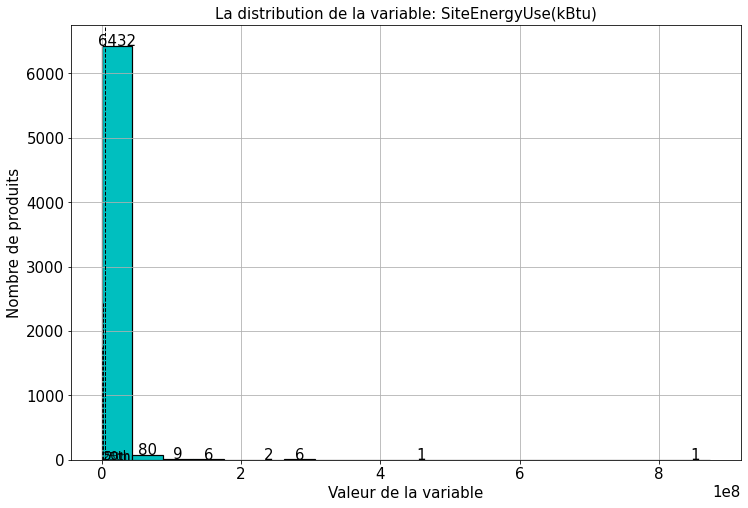

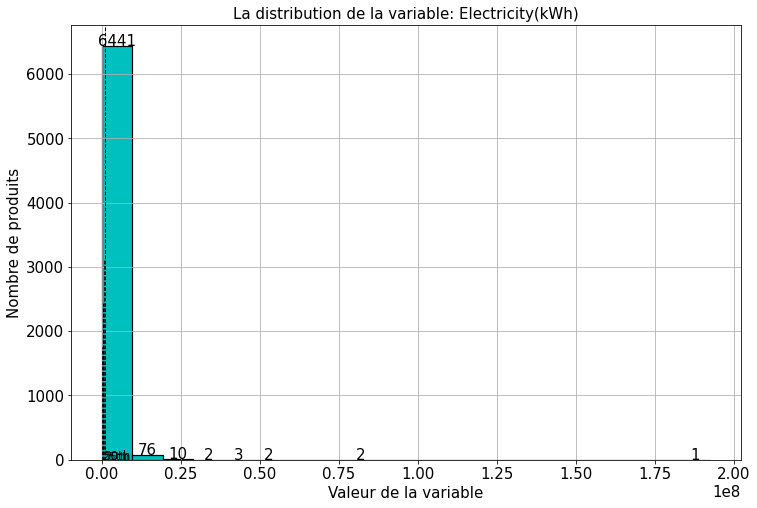

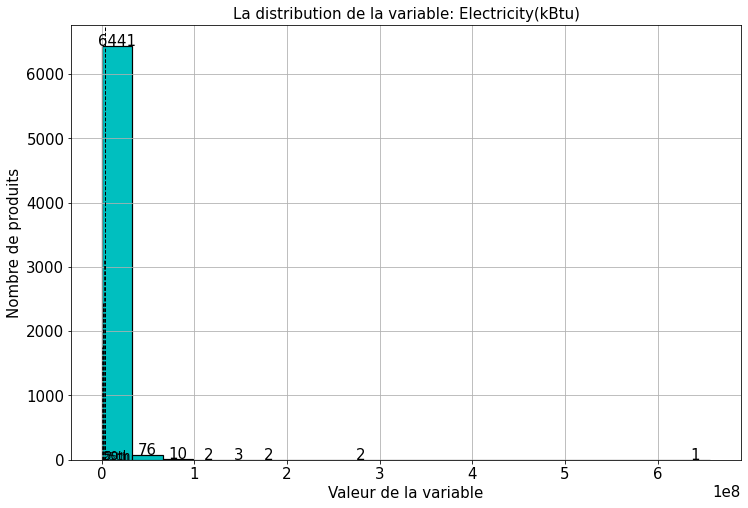

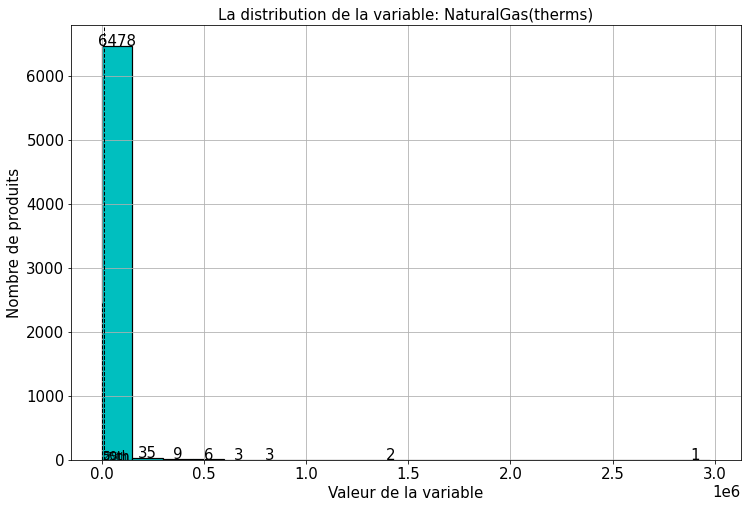

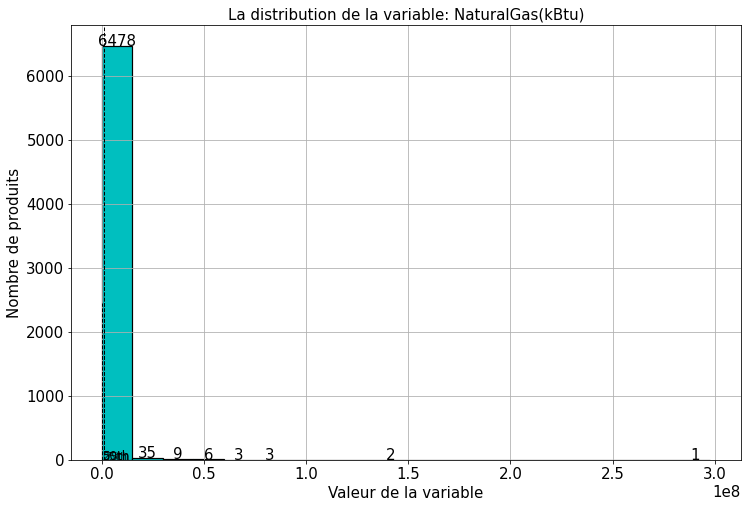

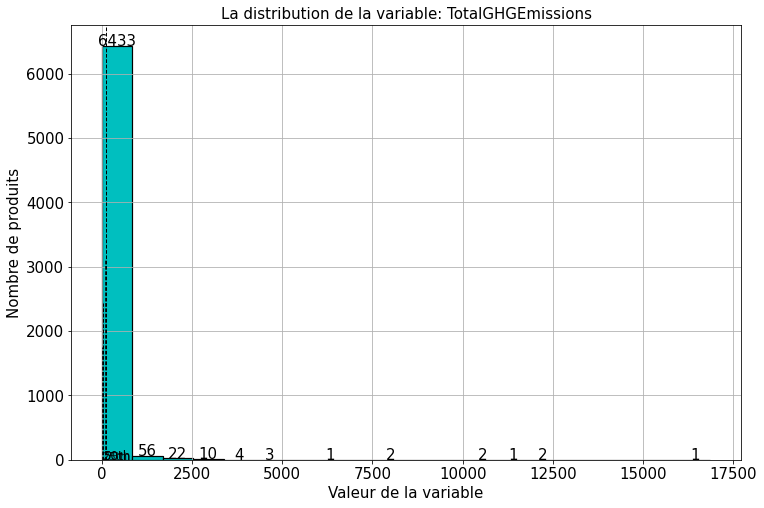

In [46]:
def histogram(data, name):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre
    fig, ax = plt.subplots(1, figsize=(12,8))
    quant_25, quant_50, quant_75 =  data.quantile(0.25), data.quantile(0.5), data.quantile(0.75)
    n, bins, patches=plt.hist(data,bins=20,color='c',edgecolor='black', linewidth=1.2 )
    quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
    ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
    ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
    ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
    ax.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
    for i in quants:
        ax.axvline(i[0], alpha = i[1], ymax = i[2],color='k', linestyle = 'dashed', linewidth=1)
    xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
    for idx, value in enumerate(n):
        if value > 0:
           plt.text(xticks[idx], value+2, int(value), ha='center')

    plt.ylabel("Nombre de produits")
    plt.xlabel("Valeur de la variable")
    plt.grid()
    
    plt.title("La distribution de la variable: "+elt)
    plt.show()
   

for elt in numerical :
    histogram(data_full[elt],elt) 

On remarque qu'il y a une valeure trop élevée sur la variable SiteEnergyUse(kBtu), on va pousser notre analyse sur ces éléments. Dans le cas particulier de la variable 'SiteEnergyUse(kBtu)',  Il ne s'agit sans doute pas d'une valeur abérrante mais d'une valeur atypique comme décrit en bas, où le batiment est de type Campus  (PrimaryPropertyType= University) et on va trouver dans nos analyses encore que sur ces deux types que la consommation électrique est élevée. Mais comme cette valeur est trop isolée de l'ensemble du nuage de données, on va la retirer.

In [47]:
data_full[data_full['SiteEnergyUse(kBtu)'] == data_full['SiteEnergyUse(kBtu)'].max()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,98105.0,NORTHEAST,47.65644,-122.31041,1900,...,NaN,NaN,NaN,873923712.0,192577488.0,657074389.0,0.0,0.0,11140.56,1.2


In [48]:
data_full[data_full['SiteEnergyUse(kBtu)']< data_full['SiteEnergyUse(kBtu)'].max()] 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,98101.0,DOWNTOWN,47.6122,-122.33799,1927,...,NaN,NaN,60.0,7226362.5,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,DOWNTOWN,47.61317,-122.33393,1996,...,4622.0,NaN,61.0,8387933.0,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,98101.0,DOWNTOWN,47.61393,-122.3381,1969,...,NaN,NaN,43.0,72587024.0,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,98101.0,DOWNTOWN,47.61412,-122.33664,1926,...,NaN,NaN,56.0,6794584.0,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),98121.0,DOWNTOWN,47.61375,-122.34047,1980,...,0.0,NaN,75.0,14172606.0,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,18379.0,DOWNTOWN,47.59950256,-122.32034302,2000,...,NaN,NaN,71.0,1142949.0,3.349790e+05,1142996.0,0.00000,0.0,7.97,0.07
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,18383.0,NORTHEAST,47.65752471,-122.3160159,2014,...,NaN,NaN,98.0,1543282.0,3.257050e+05,1111352.0,4320.00000,431976.0,30.69,0.61
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,19576.0,DOWNTOWN,47.61649845,-122.33770787,2015,...,NaN,NaN,79.0,16834414.0,1.690364e+06,5767761.0,110669.00000,11066893.0,627.97,1.89
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,18792.0,NORTHEAST,47.68396954,-122.2874088,1981,...,NaN,NaN,44.0,777064.0,2.277440e+05,777096.0,0.00000,0.0,5.42,0.04


On remarque que les graphes des variables D'aprés le graphe précédent, on peut remarquer que nos données comporte beaucoup de données qui dépassent la borne supérieure Q3 + whis*(Q3-Q1), mais il s'agit des valeurs qu'on peut trouver dans la vie réelle.Il serait plus judicieux d'utiliser la médiane au lieu de la moyenne , vu que la médiane est moins sensible aux outliers. 

#### les graphiques circulaires

In [49]:
def Pieplot(data, name):
    BIGGER_SIZE=15
    plt.rc('font', size=BIGGER_SIZE)# taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)# taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)# taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)# taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)# taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)# taille du titre  
    plt.rc('figure', titlesize=BIGGER_SIZE)
    explodes = np.zeros(len(data[name].unique()))
    explodes[np.argmax(list(data.groupby(name).count()[list(data.columns)[-1]]))] = .1
    plt.figure(figsize=(20,15))  
    plt.pie(list(data.groupby(name).count()[list(data.columns)[-1]]), wedgeprops={'edgecolor':'black'},shadow=True,
        explode=None,autopct='%1.2f%%', startangle=90)   
    plt.grid()
    plt.axis("equal")
    plt.ylabel("")
    #plt.rcParams["legend.loc"]=0
    plt.legend(loc='right',labels=data[name].unique(),fontsize='xx-small')
    plt.title("Pie chart de la variable: "+ name)
    plt.show()


#data_full.plot.bar(x="BuildingType")

In [50]:
data_full["LargestPropertyUseType"].unique()
len(data_full["LargestPropertyUseType"].unique())

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'K-12 School', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       '

58

In [51]:
categorical_pie=["BuildingType","Neighborhood"]


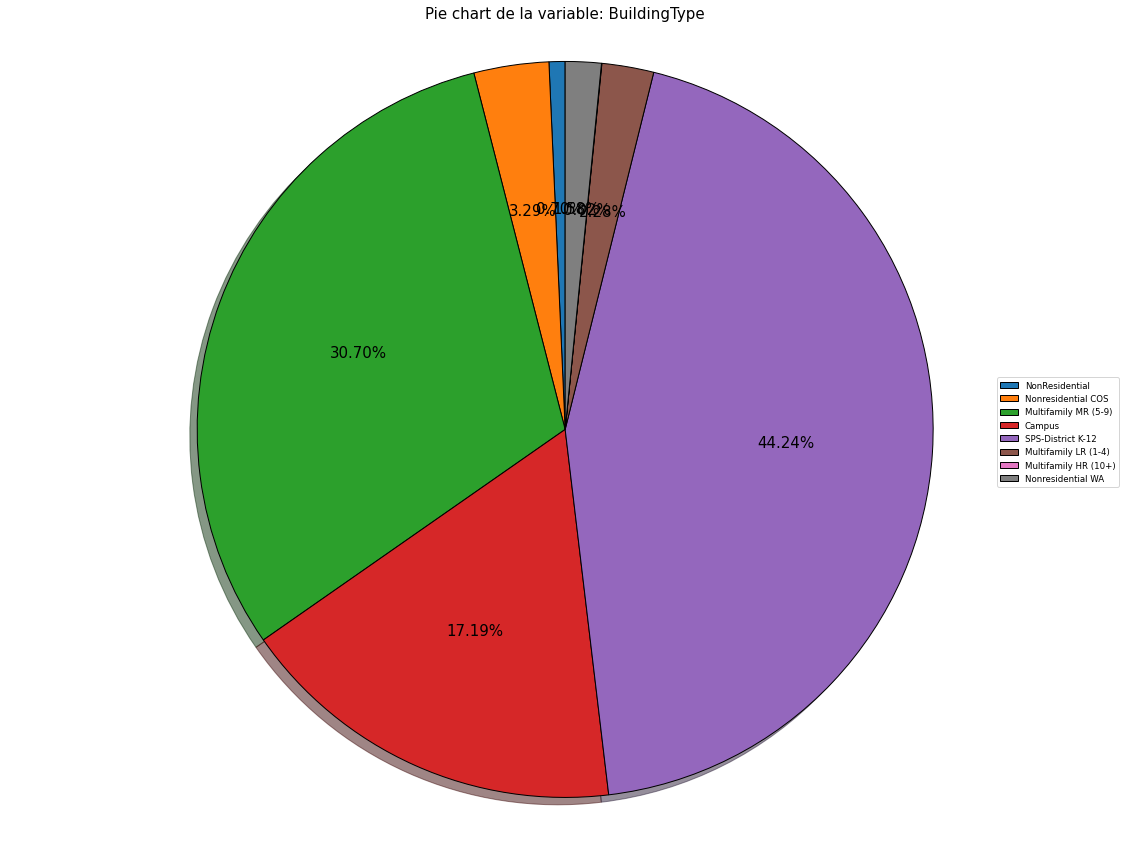

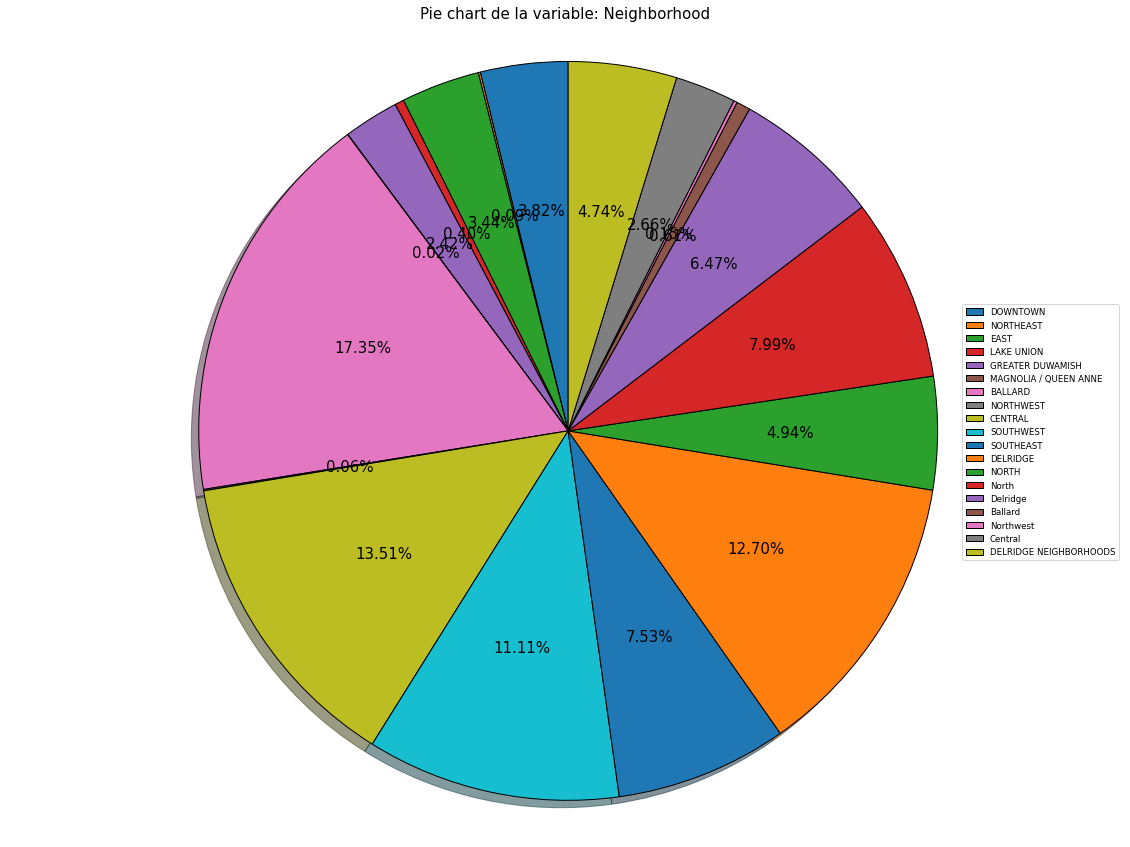

In [52]:
for elt in categorical_pie :
    Pieplot(data_full,elt) 

### Analyse bivariée

#### Les Graphiques à deux variables

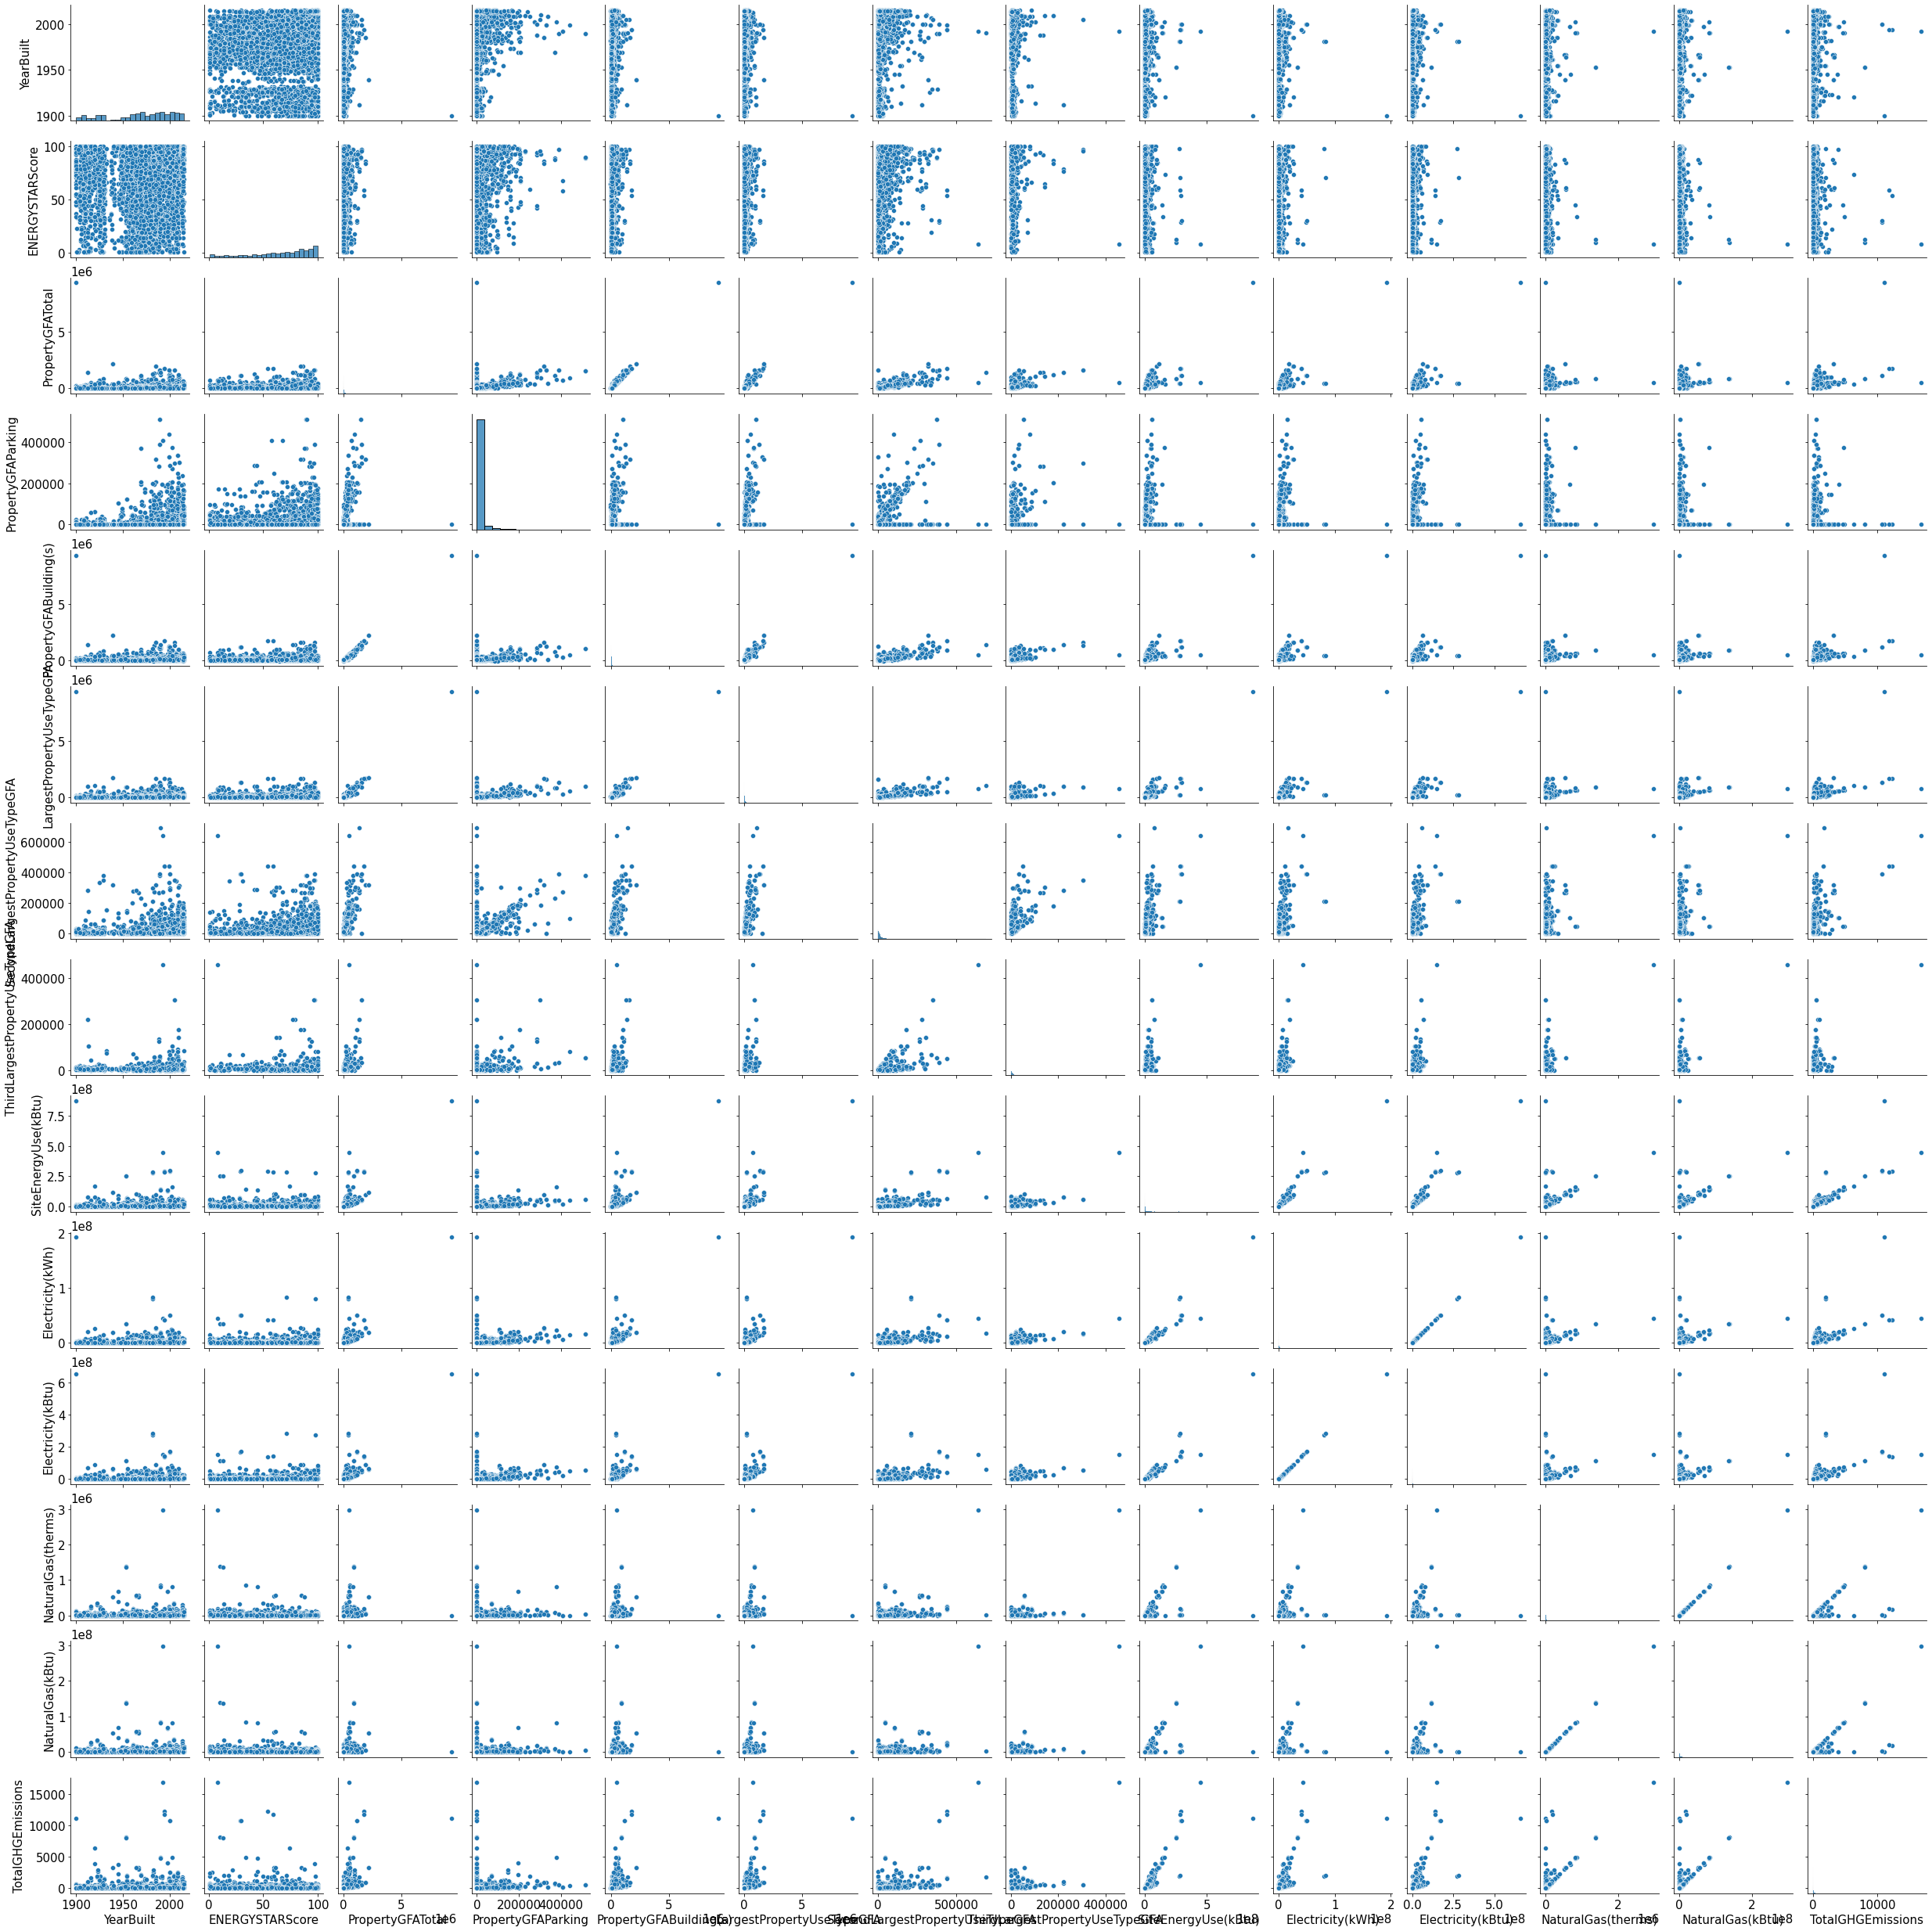

In [53]:
sns.pairplot(data_full[numerical])

On remarque la forte corrélation entre les variables:

-"Electricity(kWh)" et "Electricity(kBtu)"

-"NaturalGas(therms)" et "NaturalGas(kBtu)"

-"PropertyGFATotal" avec "PropertyGFAParking" et "PropertyGFABuilding(s)"

-"LargestPropertyUseTypeGFA" avec "PropertyGFATotal" et "PropertyGFABuilding(s)"

#### La matrice des corrélations

Dans cette partie, on va créer la matrice des corrélations, pour étudier la corrélation entre nos variables.


In [54]:
matrice_corr=data_full.corr()
matrice_corr

,OSEBuildingID,DataYear,ZipCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000000,0.037165,0.032773,0.166827,0.018628,-0.113178,-0.184036,-0.202571,-0.159454,-0.151685,-0.205711,-0.174963,0.083058,-0.159612,-0.180254,-0.180256,-0.087637,-0.087637,-0.118234,-0.038817
DataYear,0.037165,1.000000,0.999944,0.015922,0.023325,0.010472,0.013142,-0.039577,0.021994,0.013300,0.005256,0.021011,-0.011840,0.015169,0.012972,0.012966,0.011669,0.011669,0.012507,0.058412
ZipCode,0.032773,0.999944,1.000000,0.015948,0.023535,0.010869,0.013546,-0.039607,0.022438,0.013766,0.005467,0.023216,-0.011932,0.015310,0.013182,0.013176,0.011729,0.011729,0.012507,0.054884
YearBuilt,0.166827,0.015922,0.015948,1.000000,-0.016134,0.145294,0.130033,0.217634,0.098041,0.098828,0.199817,0.096365,0.022966,0.048522,0.065105,0.065106,0.024810,0.024810,0.022385,-0.151735
NumberofBuildings,0.018628,0.023325,0.023535,-0.016134,1.000000,-0.022417,0.592347,0.004327,0.640347,0.659962,0.124049,-0.008364,-0.007935,0.584139,0.613728,0.613722,0.095931,0.095931,0.338362,0.024582
NumberofFloors,-0.113178,0.010472,0.010869,0.145294,-0.022417,1.000000,0.473079,0.431991,0.427313,0.417721,0.496943,0.257035,0.024500,0.252297,0.305933,0.305936,0.080133,0.080133,0.157835,-0.039672
PropertyGFATotal,-0.184036,0.013142,0.013546,0.130033,0.592347,0.473079,1.000000,0.494823,0.985347,0.967278,0.814652,0.556455,0.065295,0.764180,0.807424,0.807423,0.244721,0.244721,0.528366,0.021642
PropertyGFAParking,-0.202571,-0.039577,-0.039607,0.217634,0.004327,0.431991,0.494823,1.000000,0.339357,0.384618,0.526335,0.295380,0.070009,0.225077,0.278809,0.278813,0.099183,0.099183,0.120525,-0.052712
PropertyGFABuilding(s),-0.159454,0.021994,0.022438,0.098041,0.640347,0.427313,0.985347,0.339357,1.000000,0.971172,0.793599,0.565979,0.057093,0.783023,0.819287,0.819286,0.245436,0.245436,0.548283,0.033772
LargestPropertyUseTypeGFA,-0.151685,0.013300,0.013766,0.098828,0.659962,0.417721,0.967278,0.384618,0.971172,1.000000,0.771641,0.452886,0.059246,0.803721,0.829805,0.829803,0.262455,0.262454,0.579115,0.053239


<Figure size 1296x1008 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélations ')

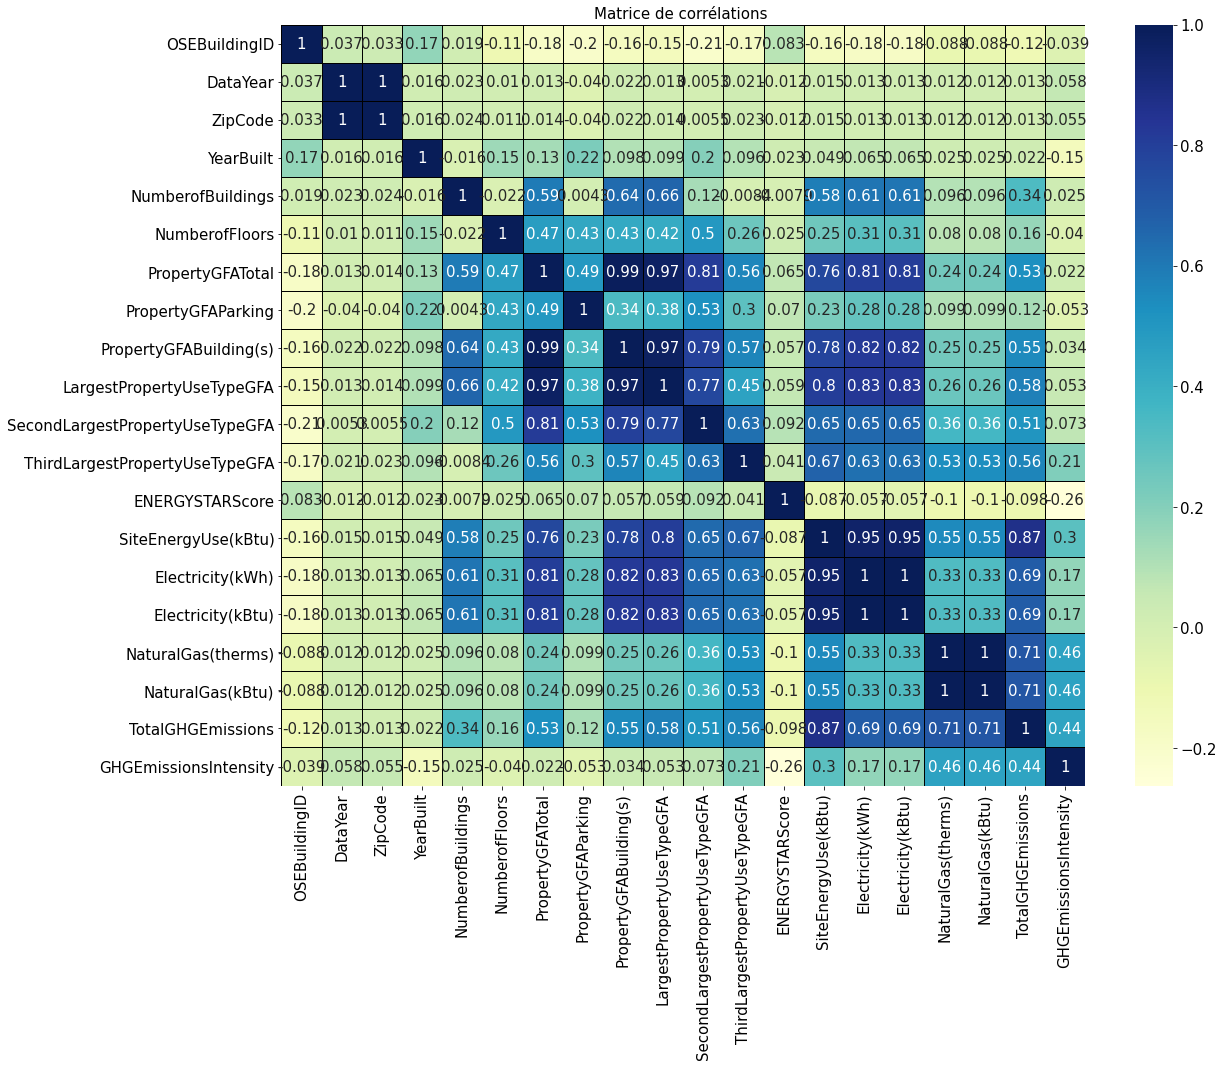

In [55]:
plt.figure(figsize=(18,14))
sns.heatmap(matrice_corr,linewidths=.5, cmap="YlGnBu",annot=True, linecolor='black' )

plt.title('Matrice de corrélations ')
plt.show()

In [56]:
threshold = 0.8
corr_pairs = matrice_corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
32,NaturalGas(therms),NaturalGas(kBtu),1.000000
30,Electricity(kWh),Electricity(kBtu),1.000000
28,ZipCode,DataYear,0.999944
26,PropertyGFATotal,PropertyGFABuilding(s),0.985347
24,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.971172
22,PropertyGFATotal,LargestPropertyUseTypeGFA,0.967278
20,SiteEnergyUse(kBtu),Electricity(kWh),0.952046
18,Electricity(kBtu),SiteEnergyUse(kBtu),0.952046
16,TotalGHGEmissions,SiteEnergyUse(kBtu),0.869023
14,Electricity(kWh),LargestPropertyUseTypeGFA,0.829805


On remarque la corrélation forte entre:
-'NaturalGas(kBtu)' et 'NaturalGas(therms)'

-'SiteEnergyUse(kBtu)' avec 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'Electricity(kWh)' et 'Electricity(kBtu)'

-'PropertyGFATotal' avec 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'Electricity(kWh)' et 'Electricity(kBtu)'

-'PropertyGFABuilding(s)' avec 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','SiteEnergyUse(kBtu)', 'Electricity(kWh)' et 'Electricity(kBtu)'

-'Electricity(kWh)' avec 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'PropertyGFATotal', 'PropertyGFABuilding(s)' et 'LargestPropertyUseTypeGFA'

-'Electricity(kBtu)' avec  'SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'PropertyGFABuilding(s)' et 'LargestPropertyUseTypeGFA'

De plus avec toues les infos qu'on  a eu sur les colonnes 'NaturalGas(kBtu)' et 'NaturalGas(therms)', on peut dire qu'elles sont redondantes. La meme chose s'applique sur 'Electricity(kWh)' et'Electricity(kBtu)', On va garder une colonne seulement des deux.

#### Analyse de la répartition du 'SiteEnergyUse(kBtu)' sur 'PrimaryPropertyType' via la boite à moustaches

<Figure size 1296x864 with 0 Axes>

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='PrimaryPropertyType'>

Text(0.5, 0.98, "Répartition de la consommation d'énergie en fonction du type de la propriété")

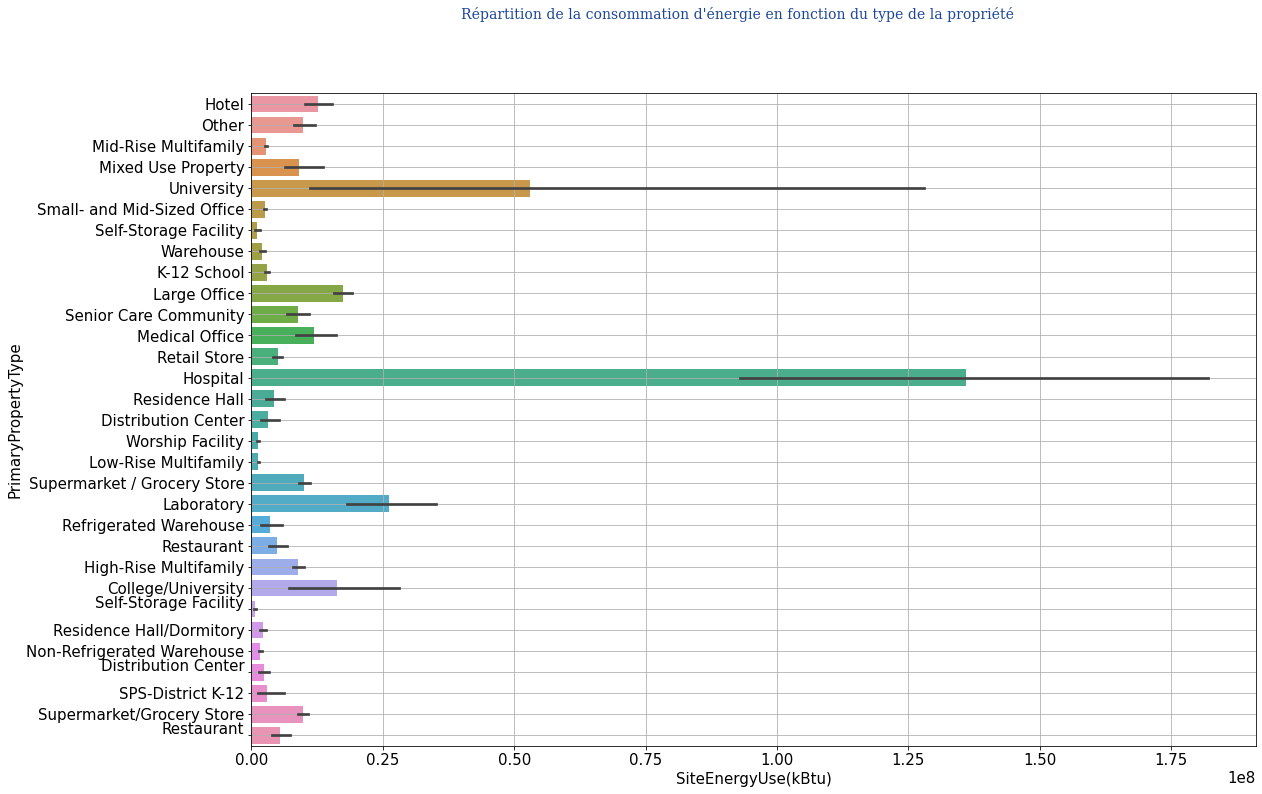

In [57]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 10,
             }
plt.figure(figsize=(18,12))
#fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(40,10))
#sns.barplot(y='BuildingType',x='TotalGHGEmissions',data=data_full, ax=axes[0],orient="h")
sns.barplot(y='PrimaryPropertyType', x='SiteEnergyUse(kBtu)', data=data_full, orient="h")
plt.suptitle("Répartition de la consommation d'énergie en fonction du type de la propriété", 
             fontdict=font_title, fontsize=14)
plt.grid()
plt.show()


On remarque que les statistiques nt le meme ordre de grandeur sur les différentes types des batiments, à part pour quelques types comme, 'Hospital','University' et 'Laboratory'

#### Analyse de la répartition du 'SiteEnergyUse(kBtu)' sur 'BuildingType' via la boite à moustaches

<Figure size 1296x864 with 0 Axes>

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='BuildingType'>

Text(0.5, 0.98, "Répartition de la consommation d'énergie en fonction du type de bâtiment")

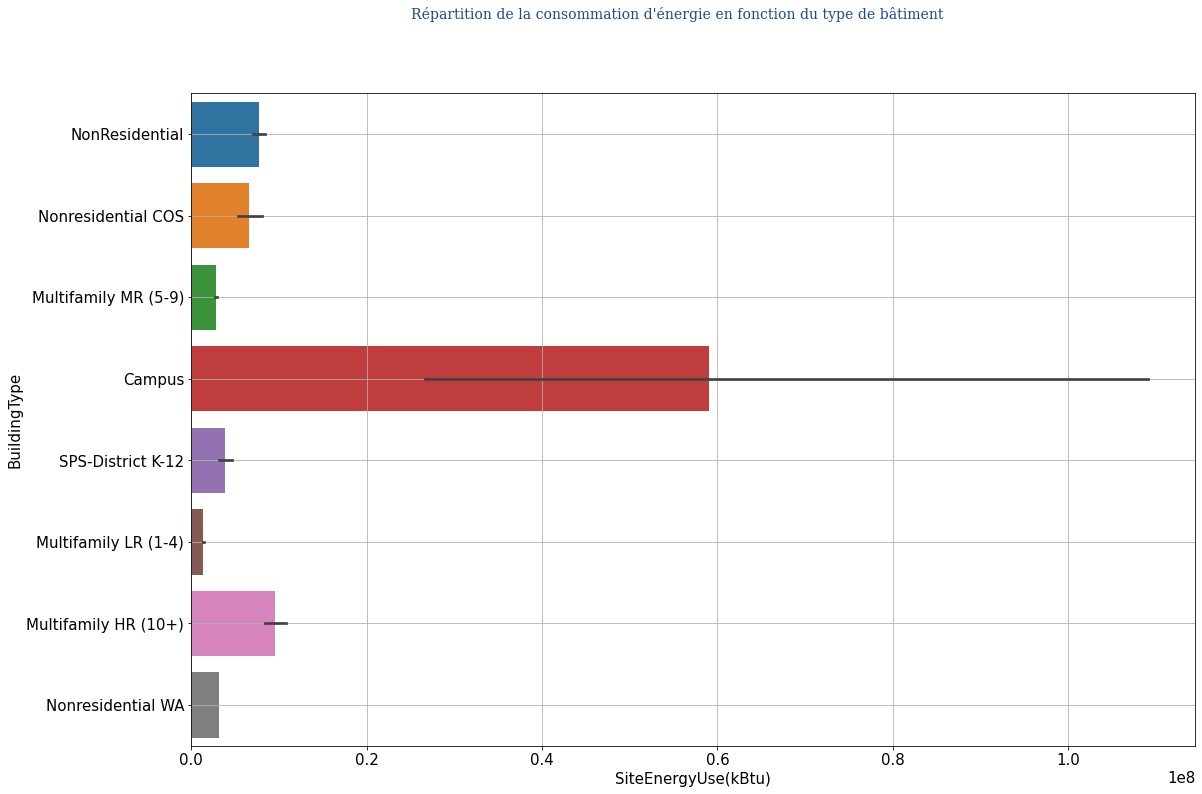

In [58]:
plt.figure(figsize=(18,12))
sns.barplot(y='BuildingType',x='SiteEnergyUse(kBtu)',data=data_full,orient="h")
plt.suptitle("Répartition de la consommation d'énergie en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=14)
plt.grid()
plt.show()



On remarque que les campus se démarquent largement en terme de consommation.

#### Analyse de l'Influence de l'âge des bâtiments sur 'SiteEnergyUse(kBtu)'

Text(0.5, 1.0, "Influence de l'âge des bâtiments sur les consommations d'énergie")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0.0, 11.5]'),
  Text(1, 0, '(11.5, 23.0]'),
  Text(2, 0, '(23.0, 35.0]'),
  Text(3, 0, '(35.0, 46.5]'),
  Text(4, 0, '(46.5, 58.0]'),
  Text(5, 0, '(58.0, 69.5]'),
  Text(6, 0, '(69.5, 81.0]'),
  Text(7, 0, '(81.0, 93.0]'),
  Text(8, 0, '(93.0, 104.5]'),
  Text(9, 0, '(104.5, 116.0]')])

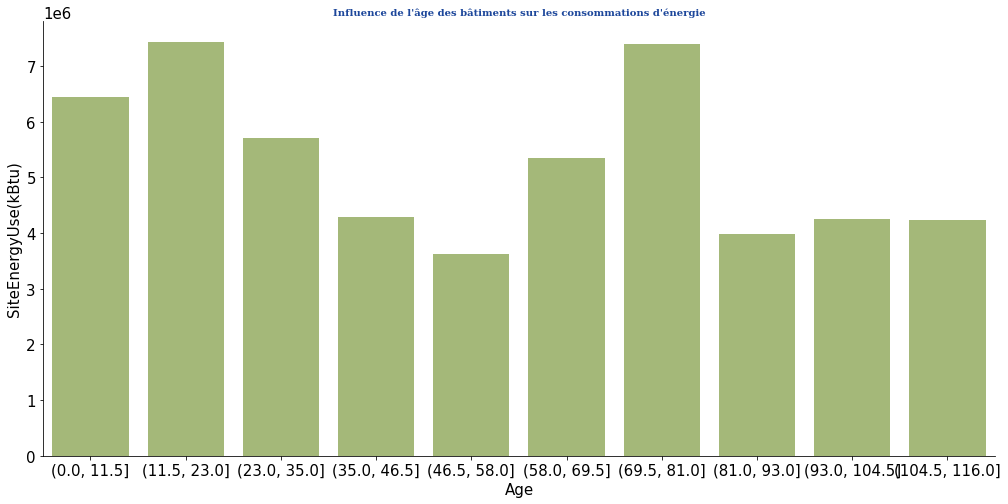

In [59]:
data_full["Age"]=data_full["DataYear"]-data_full["YearBuilt"]
sns.catplot(
    data=data_full, kind="bar",
    x=pd.cut(data_full['Age'],bins=[0,11.5,23,35,46.5,58,69.5,81,93,104.5,116]), y="SiteEnergyUse(kBtu)",
    ci=None, color="#6D9C0E", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie", fontdict=font_title)
plt.xticks()
plt.show()

Les bâtiments de moins de 35 ans semblent avoir des consommations d'énergie plus important que les anciens batiments

In [60]:
data_full.describe()

,OSEBuildingID,DataYear,ZipCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age
count,6537.000000,6537.000000,6524.000000,6537.000000,6537.000000,6529.000000,6.537000e+03,6537.000000,6.537000e+03,6.393000e+03,...,1143.000000,4959.000000,6.537000e+03,6.537000e+03,6.537000e+03,6.537000e+03,6.537000e+03,6537.000000,6537.000000,6537.000000
mean,20954.485697,2015.490592,57624.694206,1968.183112,1.072663,4.747128,9.334231e+04,9753.667585,8.358864e+04,7.719523e+04,...,11321.838494,67.583989,5.256152e+06,1.064980e+06,3.633786e+06,1.319145e+04,1.319145e+06,116.038990,1.085325,47.307480
std,11835.850284,0.499950,39661.985297,33.074583,1.613347,5.528717,1.891176e+05,34290.662651,1.747098e+05,1.696632e+05,...,26419.189345,27.061860,1.834405e+07,3.698838e+06,1.262059e+07,5.749805e+04,5.749806e+06,484.392317,1.744383,33.070402
min,1.000000,2015.000000,17916.000000,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,...,0.000000,1.000000,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000,0.000000
25%,20000.000000,2015.000000,18390.000000,1948.000000,1.000000,2.000000,2.838000e+04,0.000000,2.718200e+04,2.500000e+04,...,2351.000000,52.000000,9.269230e+05,1.874463e+05,6.395670e+05,0.000000e+00,0.000000e+00,9.470000,0.160000,19.000000
50%,23080.000000,2015.000000,19584.000000,1974.000000,1.000000,4.000000,4.388400e+04,0.000000,4.206400e+04,3.900000e+04,...,5100.000000,75.000000,1.791866e+06,3.435130e+05,1.172114e+06,3.019000e+03,3.019040e+05,33.170000,0.530000,41.000000
75%,25886.000000,2016.000000,98112.000000,1997.000000,1.000000,5.000000,9.000000e+04,0.000000,8.146100e+04,7.417800e+04,...,10280.000000,90.000000,4.188660e+06,8.259299e+05,2.818073e+06,1.143400e+04,1.143400e+06,91.760000,1.280000,68.000000
max,50226.000000,2016.000000,98272.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,459748.000000,100.000000,8.739237e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000,116.000000


## Prétraitement des données



Dans cette partie on va préparer notre jeu de données à l'étape de la modélisation pour l'apprentissage, on appelle " Data Preprocessing" ou prétraitement des données.
On va suivre deux démarches, la première se base sur la prise des moyenne sur les variables numériques pour chaque 'OSEBuildingID', et la deuxième qui se base sur la suppression des 'OSEBuildingID'.


### Unicité des identifiants 'OSEBuildingID'

On va commencer par la consolidation des types des données, puis on va nous débarasser des duplicats sur 'OSEBuildingID', car c'est la variable qui identifie nos individus, donc il faut effectuer des agrégations sur les variables numériques et ne garder que les données récentes pour les variables catégorielles, pour garder au final qu'un seul identifiant.

In [61]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6537 entries, 0 to 3339
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6537 non-null   int64  
 1   DataYear                         6537 non-null   int64  
 2   BuildingType                     6537 non-null   object 
 3   PrimaryPropertyType              6537 non-null   object 
 4   PropertyName                     6537 non-null   object 
 5   ZipCode                          6524 non-null   float64
 6   Neighborhood                     6537 non-null   object 
 7   Latitude                         6537 non-null   object 
 8   Longitude                        6537 non-null   object 
 9   YearBuilt                        6537 non-null   int64  
 10  NumberofBuildings                6537 non-null   float64
 11  NumberofFloors                   6529 non-null   float64
 12  PropertyGFATotal    

On remarque que 'Latitude' et 'Longitude' sont de type object, alors qu'ils représentent des 'float', donc on va les changer en 'float'.

On va séparer nos variables en fonction de leurs types pour effectuer nos opérations de préprocessing

In [62]:
data_full=data_full.astype({"Latitude": float, "Longitude": float})
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6537 entries, 0 to 3339
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6537 non-null   int64  
 1   DataYear                         6537 non-null   int64  
 2   BuildingType                     6537 non-null   object 
 3   PrimaryPropertyType              6537 non-null   object 
 4   PropertyName                     6537 non-null   object 
 5   ZipCode                          6524 non-null   float64
 6   Neighborhood                     6537 non-null   object 
 7   Latitude                         6537 non-null   float64
 8   Longitude                        6537 non-null   float64
 9   YearBuilt                        6537 non-null   int64  
 10  NumberofBuildings                6537 non-null   float64
 11  NumberofFloors                   6529 non-null   float64
 12  PropertyGFATotal    

In [63]:
numerical=data_full.select_dtypes(include=['int64','float64'])
numerical
categrical=data_full.select_dtypes(exclude=['int64','float64'])
categrical

,OSEBuildingID,DataYear,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age
0,1,2016,98101.0,47.612200,-122.337990,1927,1.0,12.0,88434,0,...,NaN,60.0,7226362.5,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,89
1,2,2016,98101.0,47.613170,-122.333930,1996,1.0,11.0,103566,15064,...,4622.0,61.0,8387933.0,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,20
2,3,2016,98101.0,47.613930,-122.338100,1969,1.0,41.0,956110,196718,...,NaN,43.0,72587024.0,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19,47
3,5,2016,98101.0,47.614120,-122.336640,1926,1.0,10.0,61320,0,...,NaN,56.0,6794584.0,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67,90
4,8,2016,98121.0,47.613750,-122.340470,1980,1.0,18.0,175580,62000,...,0.0,75.0,14172606.0,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,18379.0,47.599503,-122.320343,2000,1.0,4.0,44650,0,...,NaN,71.0,1142949.0,3.349790e+05,1142996.0,0.00000,0.0,7.97,0.07,15
3336,50055,2015,18383.0,47.657525,-122.316016,2014,1.0,7.0,42393,0,...,NaN,98.0,1543282.0,3.257050e+05,1111352.0,4320.00000,431976.0,30.69,0.61,1
3337,50057,2015,19576.0,47.616498,-122.337708,2015,1.0,40.0,319481,41915,...,NaN,79.0,16834414.0,1.690364e+06,5767761.0,110669.00000,11066893.0,627.97,1.89,0
3338,50058,2015,18792.0,47.683970,-122.287409,1981,1.0,3.0,48230,0,...,NaN,44.0,777064.0,2.277440e+05,777096.0,0.00000,0.0,5.42,0.04,34


,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified
0,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN
1,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN
...,...,...,...,...,...,...,...,...,...
3335,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,DOWNTOWN,Multifamily Housing,Multifamily Housing,NaN,NaN,NaN
3336,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,NORTHEAST,Multifamily Housing,Multifamily Housing,NaN,NaN,NaN
3337,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,DOWNTOWN,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN
3338,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,NORTHEAST,Multifamily Housing,Multifamily Housing,NaN,NaN,NaN


In [64]:
data_mean=data_full[numerical.columns].groupby('OSEBuildingID').mean()
data_mean

,DataYear,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2015.5,58091.0,47.612195,-122.337994,1927.0,1.0,12.0,88434.0,0.0,88434.0,...,NaN,62.5,7.103895e+06,1.118411e+06,3.816094e+06,12744.264650,1.274420e+06,249.705,2.735,88.5
2,2015.5,58091.0,47.613138,-122.333644,1996.0,1.0,11.0,103566.0,15064.0,88502.0,...,4622.0,56.0,8.371084e+06,1.047494e+06,3.574131e+06,47970.408205,4.797034e+06,279.685,2.620,19.5
3,2015.5,58091.0,47.613639,-122.337900,1969.0,1.0,41.0,959050.0,98359.0,860691.0,...,0.0,30.5,7.285884e+07,1.454968e+07,4.964455e+07,26018.500000,2.601850e+06,2075.380,2.055,46.5
5,2015.5,58091.0,47.614168,-122.336624,1926.0,1.0,10.0,61320.0,0.0,61320.0,...,NaN,28.5,1.751195e+07,8.115232e+05,2.768974e+06,19065.565430,1.906554e+06,1111.385,18.025,89.5
8,2015.5,58848.5,47.613752,-122.340697,1980.0,1.0,18.0,147735.0,37230.0,110505.0,...,0.0,71.0,1.450085e+07,1.675645e+06,5.717426e+06,87835.492190,8.783552e+06,506.355,3.450,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,2016.0,NaN,47.540670,-122.374410,1982.0,1.0,1.0,18261.0,0.0,18261.0,...,NaN,NaN,9.320821e+05,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.330,1.110,34.0
50223,2016.0,NaN,47.596250,-122.322830,2004.0,1.0,1.0,16000.0,0.0,16000.0,...,NaN,NaN,9.502762e+05,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.170,2.010,12.0
50224,2016.0,NaN,47.636440,-122.357840,1974.0,1.0,1.0,13157.0,0.0,13157.0,...,0.0,NaN,5.765898e+06,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.540,16.990,42.0


In [65]:
duplicate_building = data_full.drop_duplicates(subset=['OSEBuildingID'], keep='first')
cols_drop=list(set(numerical.columns)-set(['OSEBuildingID']))
duplicate_building.drop(cols_drop, axis=1, inplace=True)
data = pd.merge(duplicate_building, data_mean, how='left', on='OSEBuildingID')
data

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Age
0,1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,...,NaN,62.5,7.103895e+06,1.118411e+06,3816093.5,12744.264650,1274420.5,249.705,2.735,88.5
1,2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,...,4622.0,56.0,8.371084e+06,1.047494e+06,3574131.0,47970.408205,4797033.5,279.685,2.620,19.5
2,3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,...,0.0,30.5,7.285884e+07,1.454968e+07,49644549.5,26018.500000,2601850.0,2075.380,2.055,46.5
3,5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,...,NaN,28.5,1.751195e+07,8.115232e+05,2768973.5,19065.565430,1906553.5,1111.385,18.025,89.5
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,...,0.0,71.0,1.450085e+07,1.675645e+06,5717426.0,87835.492190,8783551.5,506.355,3.450,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,43948,Nonresidential COS,Other,GEORGETOWN STEAM PLANT,GREATER DUWAMISH,Other,Other,NaN,NaN,NaN,...,NaN,NaN,7.730130e+05,2.265570e+05,773045.0,0.000000,0.0,5.390,0.050,109.0
3414,49703,SPS-District K-12,K-12 School,BLAINE K-8 SCHOOL & MAGNOLIA COMMUNITY CENTER ...,MAGNOLIA / QUEEN ANNE,K-12 School,K-12 School,NaN,NaN,NaN,...,NaN,65.0,6.344171e+06,3.813740e+05,1301302.0,50429.000000,5042923.0,276.900,2.340,63.0
3415,49769,Multifamily MR (5-9),Mid-Rise Multifamily,Test MF High Use (ID 49769),LAKE UNION,Multifamily Housing,Multifamily Housing,NaN,NaN,NaN,...,NaN,100.0,1.007650e+06,1.250000e+04,42652.0,9650.000000,965000.0,51.550,1.170,95.0
3416,49859,Campus,Other,AMGEN INC. MASTER CAMPUS,MAGNOLIA / QUEEN ANNE,Other,Other,NaN,NaN,NaN,...,NaN,NaN,1.576065e+08,2.249086e+07,76742000.0,808676.000000,80867644.0,4829.860,5.570,13.0


### Liste des variables

On va retirer les variables: 
- 'OSEBuildingID': il s'agit des identifiants. 
- 'PropertyName' : On a entrainé notre model, avec cette variable, mais après le OneHotEncoder, ça a créé plus de 6000 nouvelle feature, ce qui nous positione dans un système linéaire où le nombre de colonnes sont trop supérieur aux nombres de lignes, la chose qui a induit un overfitting. Ainsi, l'information n'est pas trop intéressante pour le model.
- 'ListOfAllPropertyUseTypes' : Les informations contenue dans cette variable sont contenues dans "LargestPropertyUseType" 	"SecondLargestPropertyUseType", "ThirdLargestPropertyUseType". 
- la différence entre "DataYear" et "YearBuilt" nous donne l'age du batiment, à partir de ces deux colonnes , on a crée une colonne "Age" et on va retirer les deux colonnes.
- On va retirer la colonne 'PropertyGFATotal' et on va garder les colonnes 'PropertyGFABuilding(s)' et 'PropertyGFAParking', comme la première est la somme des deux autres.
- On va retirer la colonne 'YearsENERGYSTARCertified' on n'a pas d'information sur cette colonne et on a beaucoup de données manquantes

In [66]:
data_full.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Age'],
      dtype='object')

In [67]:
data_full.drop(columns = ['YearsENERGYSTARCertified', 'PropertyGFATotal',"Electricity(kWh)","NaturalGas(kBtu)","GHGEmissionsIntensity","Electricity(kBtu)", "NaturalGas(therms)",'OSEBuildingID','PropertyName','ListOfAllPropertyUseTypes','YearBuilt','DataYear','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'], inplace=True)

On va supprimer les valeurs manquantes sur nos 2 variables et On va assurer qu'elles contiennent que des valeurs supérieures strictement à zéro, et on va enregistrer notre dataset nettoyé pour l'utiliser dans un autre notebook qui, va contenir nos algorithmes de prédiction 


In [68]:
data_full.dropna( subset=['TotalGHGEmissions','SiteEnergyUse(kBtu)'], inplace=True)

In [69]:
data_full = data_full[(data_full['TotalGHGEmissions'] >0) &  (data_full['SiteEnergyUse(kBtu)']>0)]

In [70]:
data_full.describe()

,ZipCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Age
count,6519.000000,6532.000000,6532.000000,6532.000000,6524.000000,6532.000000,6.532000e+03,6.388000e+03,3202.000000,1140.000000,4956.000000,6.532000e+03,6532.000000,6532.000000
mean,57618.192974,47.624310,-122.335065,1.072719,4.744635,9758.369565,8.359101e+04,7.720359e+04,27981.437944,11332.747718,67.586158,5.258070e+06,116.127936,47.307869
std,39661.636091,0.047465,0.026845,1.613963,5.523639,34303.064378,1.747682e+05,1.697214e+05,52408.959057,26452.927535,27.060981,1.835044e+07,484.567028,33.066142
min,17916.000000,47.499331,-122.414250,0.000000,0.000000,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,1.144100e+04,0.080000,0.000000
25%,18390.000000,47.600403,-122.350445,1.000000,2.000000,0.000000,2.717600e+04,2.498950e+04,4974.250000,2351.000000,52.000000,9.283485e+05,9.487500,19.000000
50%,19584.000000,47.618737,-122.332659,1.000000,4.000000,0.000000,4.202250e+04,3.899650e+04,10638.000000,5068.500000,75.000000,1.793138e+06,33.225000,41.000000
75%,98112.000000,47.657024,-122.320106,1.000000,5.000000,0.000000,8.149775e+04,7.417800e+04,26476.500000,10290.000000,90.000000,4.188888e+06,92.002500,68.000000
max,98272.000000,47.733870,-122.220470,111.000000,99.000000,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,16870.980000,116.000000


In [71]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6532 entries, 0 to 3339
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6532 non-null   object 
 1   PrimaryPropertyType              6532 non-null   object 
 2   ZipCode                          6519 non-null   float64
 3   Neighborhood                     6532 non-null   object 
 4   Latitude                         6532 non-null   float64
 5   Longitude                        6532 non-null   float64
 6   NumberofBuildings                6532 non-null   float64
 7   NumberofFloors                   6524 non-null   float64
 8   PropertyGFAParking               6532 non-null   int64  
 9   PropertyGFABuilding(s)           6532 non-null   int64  
 10  LargestPropertyUseTypeGFA        6388 non-null   float64
 11  SecondLargestPropertyUseTypeGFA  3202 non-null   float64
 12  ThirdLargestProperty

In [72]:
data_full['Neighborhood']= data_full['Neighborhood'].map(lambda x: x.lower())

In [74]:
path=r"\Users\Utilisateur\Downloads\building-energy-benchmarking-clean.csv"
data_full.to_csv(path,index=False)